FIAP - Challenge TOTVS 2025

Sprint 3 - Deep Learning

Grupo Cluster Vision


Anna Paula Carbone
RM: 558152

Eduardo Ferreira
RM: 555610

Gabriel Mariotto
RM: 557816

Gabriel Moretim
RM: 557740

Guilherme Panfiete
RM: 557758

# Importações

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from yellowbrick.cluster import KElbowVisualizer

import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [2]:
df = pd.read_csv('../dados/dados_totvs/dados_clientes.csv', sep=';')

# Análise Exploratória

In [3]:
df.head(10)

,CD_CLIENTE,DS_PROD,DS_LIN_REC,CIDADE,DS_CNAE,DS_SEGMENTO,DS_SUBSEGMENTO,FAT_FAIXA,MARCA_TOTVS,MODAL_COMERC,PAIS,PERIODICIDADE,SITUACAO_CONTRATO,UF,VL_TOTAL_CONTRATO,DT_ASSINATURA_CONTRATO
0,99958,SMS FULL TOTVS TRAD,SMS TOTVS SERIE T,JOINVILLE,PESSOA FISICA (SEM CNAE),SERVICOS,PROVEDOR SERVICOS,Faixa 09 - De 300 M ate 500 M,CROSS - TRADICIONAL,MODALIDADE TRADICIONAL,105,00 - Mensal,GRATUITO,SC,"1633817,36581438",2016-04-07
1,T00053,SMS COLAB NEO 2500 DOC,SMS TOTVS SERIE T,RIODEJANEIRO,Fabricacao de preparacoes farmaceuticas,MANUFATURA,BENS DURAVEIS,Faixa 05 - De 35 M ate 50 M,MANUFATURA - PARCEIRO,MODALIDADE TRADICIONAL,105,00 - Mensal,ATIVO,RJ,"341,155636978792",2015-02-27
2,T00053,HORA SUPORTE,CONSULTORIA TRADICIONAL,RIODEJANEIRO,Fabricacao de preparacoes farmaceuticas,MANUFATURA,BENS DURAVEIS,Faixa 05 - De 35 M ate 50 M,SERVICOS DE IMPLANTACAO,MODALIDADE SERVICOS NÃO RECORRENTES,105,00 - Mensal,CANCELADO,RJ,"45,3386017130146",1997-11-28
3,99958,CDU FULL TOTVS TRAD,CDU TOTVS SERIE T,JOINVILLE,PESSOA FISICA (SEM CNAE),SERVICOS,PROVEDOR SERVICOS,Faixa 09 - De 300 M ate 500 M,CROSS - TRADICIONAL,MODALIDADE TRADICIONAL,105,00 - Mensal,GRATUITO,SC,"42,0343698218297",2016-04-07
4,T00053,PROGRESS USER 11 CDU,CDU TOTVS SERIE T,RIODEJANEIRO,Fabricacao de preparacoes farmaceuticas,MANUFATURA,BENS DURAVEIS,Faixa 05 - De 35 M ate 50 M,PROGRESS,MODALIDADE TRADICIONAL,105,00 - Mensal,TROCADO,RJ,"0,117708006301753",2017-11-22
5,99069,TOTVS RH ATS PACK 3 VAGAS,SAAS SERIE T,SAOPAULO,COMERCIO VAREJISTA ESPECIALIZADO DE EQUIPAMENT...,VAREJO,VAREJO,Sem Informações de Faturamento,RH - CORE,MODALIDADE ASSINATURA COMPLEMENTAR,105,00 - Mensal,GRATUITO,SP,"0,00420385736791976",2023-01-11
6,T00053,PROGRESS USER 11 CDU,CDU TOTVS SERIE T,RIODEJANEIRO,Fabricacao de preparacoes farmaceuticas,MANUFATURA,BENS DURAVEIS,Faixa 05 - De 35 M ate 50 M,PROGRESS,MODALIDADE TRADICIONAL,105,00 - Mensal,TROCADO,RJ,"5278,00598328378",2010-12-20
7,T00053,CDU LGT GCH ON-DEMAND 10 ALG,SAAS CDU ALUGUEL,RIODEJANEIRO,Fabricacao de preparacoes farmaceuticas,MANUFATURA,BENS DURAVEIS,Faixa 05 - De 35 M ate 50 M,RH - CORE,MODALIDADE ALUGUEL (LEGADO),105,00 - Mensal,CANCELADO,RJ,"370,048748668505",2010-08-31
8,T00053,CDU TOTVS I ALUG,SAAS CDU ALUGUEL,RIODEJANEIRO,Fabricacao de preparacoes farmaceuticas,MANUFATURA,BENS DURAVEIS,Faixa 05 - De 35 M ate 50 M,CROSS - TRADICIONAL,MODALIDADE ALUGUEL (LEGADO),105,00 - Mensal,CANCELADO,RJ,"413,155102119154",2010-08-31
9,T00053,4GL DEVELOPMENT SYSTEMUSER-LIC,SOFTWARE COMPLEMENTAR,RIODEJANEIRO,Fabricacao de preparacoes farmaceuticas,MANUFATURA,BENS DURAVEIS,Faixa 05 - De 35 M ate 50 M,SOFTWARE COMPLEMENTAR,MODALIDADE SERVICOS NÃO RECORRENTES,105,00 - Mensal,ATIVO,RJ,"5803,18127268589",2014-02-27


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238597 entries, 0 to 238596
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   CD_CLIENTE              238597 non-null  object
 1   DS_PROD                 238597 non-null  object
 2   DS_LIN_REC              238597 non-null  object
 3   CIDADE                  238597 non-null  object
 4   DS_CNAE                 238597 non-null  object
 5   DS_SEGMENTO             238597 non-null  object
 6   DS_SUBSEGMENTO          238553 non-null  object
 7   FAT_FAIXA               238597 non-null  object
 8   MARCA_TOTVS             237693 non-null  object
 9   MODAL_COMERC            226965 non-null  object
 10  PAIS                    238597 non-null  int64 
 11  PERIODICIDADE           238531 non-null  object
 12  SITUACAO_CONTRATO       238096 non-null  object
 13  UF                      238597 non-null  object
 14  VL_TOTAL_CONTRATO       238597 non-n

In [5]:
# Situações únicas de contratos

df['SITUACAO_CONTRATO'].unique()

array(['GRATUITO', 'ATIVO', 'CANCELADO', 'TROCADO', 'PENDENTE',
       'SUSPENSO', nan, 'FATURAR'], dtype=object)

In [6]:
# Registros únicos de clientes

df['CD_CLIENTE'].nunique()

10615

In [7]:
# Convertendo valores monetarios para floar/int

df["VL_TOTAL_CONTRATO"] = df["VL_TOTAL_CONTRATO"].str.replace(",", ".").astype(float)

In [8]:
# convertendo data para valor inteiro

df["DT_ASSINATURA_CONTRATO"] = df["DT_ASSINATURA_CONTRATO"].str.replace("-", "").astype(int)

In [9]:
df.describe()

,PAIS,VL_TOTAL_CONTRATO,DT_ASSINATURA_CONTRATO
count,238597.000000,2.385970e+05,2.385970e+05
mean,105.910720,3.120108e+03,2.017387e+07
std,23.695716,1.359503e+05,5.737160e+04
min,40.000000,-1.303196e-01,1.971042e+07
25%,105.000000,5.212783e+00,2.013052e+07
50%,105.000000,1.773019e+02,2.019013e+07
75%,105.000000,1.050964e+03,2.022093e+07
max,845.000000,3.558788e+07,2.025032e+07


In [10]:
# Transformando contratos de valor negativo em 0

df.loc[df["VL_TOTAL_CONTRATO"] < 0, "VL_TOTAL_CONTRATO"] = 0

In [11]:
# métricas das colunas categóricas

df.describe(include='object')

,CD_CLIENTE,DS_PROD,DS_LIN_REC,CIDADE,DS_CNAE,DS_SEGMENTO,DS_SUBSEGMENTO,FAT_FAIXA,MARCA_TOTVS,MODAL_COMERC,PERIODICIDADE,SITUACAO_CONTRATO,UF
count,238597,238597,238597,238597,238597,238597,238553,238597,237693,226965,238531,238096,238597
unique,10615,7372,88,1252,895,14,65,13,94,13,6,7,39
top,TFBZNE,SMS TOTVS TEC USER,CDU TOTVS SERIE T,SAOPAULO,Hoteis,MANUFATURA,ATACADISTA E DISTRIBUIDOR,Sem Informações de Faturamento,DISTRIBUICAO & VAREJO - CORE,MODALIDADE TRADICIONAL,00 - Mensal,ATIVO,SP
freq,641,7557,67646,37226,9364,67360,28989,49965,26742,108824,236188,124464,92330


In [12]:
# Análise do percentual de nulos

percentual_nulos = df.isnull().mean() * 100
percentual_nulos

CD_CLIENTE                0.000000
DS_PROD                   0.000000
DS_LIN_REC                0.000000
CIDADE                    0.000000
DS_CNAE                   0.000000
DS_SEGMENTO               0.000000
DS_SUBSEGMENTO            0.018441
FAT_FAIXA                 0.000000
MARCA_TOTVS               0.378882
MODAL_COMERC              4.875166
PAIS                      0.000000
PERIODICIDADE             0.027662
SITUACAO_CONTRATO         0.209977
UF                        0.000000
VL_TOTAL_CONTRATO         0.000000
DT_ASSINATURA_CONTRATO    0.000000
dtype: float64

## Compreendendo os valores únicos das colunas categóricas

In [13]:
df['DS_SUBSEGMENTO'].unique()

array(['PROVEDOR SERVICOS', 'BENS DURAVEIS', 'VAREJO', 'VIAGENS', 'TOTVS',
       'ATACADISTA E DISTRIBUIDOR', 'ENGENHARIA & DESIGN',
       'QUIMICA & RECICLAGEM', 'BENS DE CONSUMO', 'EDUCACAO CONTINUADA',
       'BENS DE CAPITAL', 'EXTRATIVISTA & BENEFICIAMENTO',
       'METAL-MECANICO & PLASTICO', 'TRANSPORTADOR', 'DROGARIA',
       'OUTRAS ATIVIDADES DE SERVIÇOS FINANCEIRO', 'SUPERMERCADO',
       'CONSTRUTORAS', 'SUCROENERGETICO', 'HOSPITAIS', 'HOSPEDAGEM',
       'ESCRITORIO DE ADVOCACIA', 'PAPEL & CELULOSE',
       'MAGAZINE E LOJA DE DEPARTAMENTOS', 'UTILITIES',
       'OPERADOR LOGISTICO', 'ORIGINACAO E BENEFICIAMENTO',
       'CONCESSIONARIA DE VEICULOS', 'TEXTIL & VESTUARIO', 'SUPERIOR',
       'MATERIAL DE CONSTRUCAO', 'MIDIA', 'BASICO', 'SAUDE', 'JURIDICO',
       'AGROINDUSTRIA', 'UTILITES', 'CENTROS CLINICOS', 'IMOBILIARIA',
       'PROVEDOR DE SERVICOS', 'PROJETOS & SERVICOS ESPECIAIS', 'PUBLICO',
       'OPERADORAS DE PLANOS DE SAUDE', 'GRAOS', 'INCORPORADORAS', 'FOOD'

In [14]:
# Preenchendo valores nulos do segmento do cliente como "Não Informado"

df['DS_SUBSEGMENTO'] = df['DS_SUBSEGMENTO'].fillna('NAO INFORMADO')

In [15]:
# Percentual de cada seguimento

df['DS_SUBSEGMENTO'].value_counts(normalize=True) * 100

DS_SUBSEGMENTO
ATACADISTA E DISTRIBUIDOR               12.149776
PROVEDOR SERVICOS                        8.889885
BENS DE CAPITAL                          6.306450
HOSPEDAGEM                               5.742738
BENS DE CONSUMO                          5.505937
                                          ...    
FINANCEIRO - CREDITO E FINANCIAMENTO     0.009640
TRANSPORTE DE PASSAGEIROS                0.009221
FINANCEIRO - HOLDINGS                    0.008382
COOPERATIVA  AGROPECUARIA                0.002934
SEGURADORAS                              0.002096
Name: proportion, Length: 66, dtype: float64

In [16]:
df['MARCA_TOTVS'].unique()

array(['CROSS - TRADICIONAL', 'MANUFATURA - PARCEIRO',
       'SERVICOS DE IMPLANTACAO', 'PROGRESS', 'RH - CORE',
       'SOFTWARE COMPLEMENTAR', 'FLUIG - CORE', 'HOSPITALIDADE - CORE',
       'MANUFATURA - CORE', 'CLOUD', 'SERVICOS - CORE',
       'MODALIDADE TRADICIONAL', 'OTIMIZACAO LOGISTICA',
       'BACKOFFICE - CORE', 'GOODDATA', 'EDUCACIONAL - CORE',
       'FINANCIAL SERVICES (DIMENSA) - PARCEIRO', 'TECNOLOGIA',
       'BACKOFFICE - PARCEIRO', 'MANUFATURA - CORPORATIVO',
       'LOGISTICA - CORE', nan, 'DISTRIBUICAO & VAREJO - CORE',
       'RH - PARCEIRO', 'AMS', 'CLOUD INTERA', 'RJ CONSULTORES', 'BSO',
       'PRIME', 'ACT', 'FEEDZ', 'MODALIDADE ALUGUEL (LEGADO)',
       'MICRO E PEQUENOS NEGOCIOS', 'MANUFATURA - PARCEIRO CORPORATIVO',
       'CROSS - PARCEIRO', 'SUPERMERCADOS - CORE',
       'DISTRIBUICAO & LOGISTICA - CORPORATIVO', 'CROSS - INTERA',
       'SAUDE - CORE', 'CROSS - CORPORATIVO', 'GESPLAN',
       'CONSTRUCAO - CORE', 'MICRO E PEQUENOS NEGOCIOS (FOOD)',
    

In [17]:
# Preenchendo valores nulos da amrca totvs como "Não Informado"

df['MARCA_TOTVS'] = df['MARCA_TOTVS'].fillna('NAO INFORMADO')

In [18]:
# Percentual de cada marca

df['MARCA_TOTVS'].value_counts(normalize=True) * 100

MARCA_TOTVS
DISTRIBUICAO & VAREJO - CORE               11.208020
BACKOFFICE - CORE                           9.928876
RH - CORE                                   8.710923
CROSS - TRADICIONAL                         8.348806
TECNOLOGIA                                  7.126661
                                             ...    
SERVICOS RECORRENTES                        0.003772
FINANCIAL SERVICES (DIMENSA) - PARCEIRO     0.002096
TOTVS DISTRIBUICAO E VAREJO                 0.001257
MODALIDADE ASSINATURA (INTERA 17/18)        0.001257
FLUIG                                       0.000419
Name: proportion, Length: 95, dtype: float64

In [19]:
df['MODAL_COMERC'].unique()

array(['MODALIDADE TRADICIONAL', 'MODALIDADE SERVICOS NÃO RECORRENTES',
       'MODALIDADE ASSINATURA COMPLEMENTAR',
       'MODALIDADE ALUGUEL (LEGADO)', 'MODALIDADE SERVICOS RECORRENTES',
       nan, 'MODALIDADE CORPORATIVO', 'OUTROS',
       'MODALIDADE ASSINATURA (INTERA)', 'SERIE 3',
       'MODALIDADE INTERA 17', 'MPN', 'SERVIÇOS', 'MODALIDADE INTERA 18'],
      dtype=object)

In [20]:
# Preenchendo valores nulos do modal comercial como "Não Informado"

df['MODAL_COMERC'] = df['MODAL_COMERC'].fillna('NAO INFORMADO')

In [21]:
# Percentual de cada modal

df['MODAL_COMERC'].value_counts(normalize=True) * 100

MODAL_COMERC
MODALIDADE TRADICIONAL                 45.609962
MODALIDADE ASSINATURA COMPLEMENTAR     21.180903
MODALIDADE CORPORATIVO                  7.286345
MODALIDADE SERVICOS RECORRENTES         6.592707
MODALIDADE SERVICOS NÃO RECORRENTES     5.634187
NAO INFORMADO                           4.875166
MODALIDADE ASSINATURA (INTERA)          4.198293
MPN                                     3.019736
MODALIDADE INTERA 17                    0.702021
MODALIDADE ALUGUEL (LEGADO)             0.699925
MODALIDADE INTERA 18                    0.106875
SERIE 3                                 0.069154
SERVIÇOS                                0.021794
OUTROS                                  0.002934
Name: proportion, dtype: float64

In [22]:
df['SITUACAO_CONTRATO'].unique()

array(['GRATUITO', 'ATIVO', 'CANCELADO', 'TROCADO', 'PENDENTE',
       'SUSPENSO', nan, 'FATURAR'], dtype=object)

In [23]:
# Preenchendo valores nulos da situação contratual como "Não Informado"

df['SITUACAO_CONTRATO'] = df['SITUACAO_CONTRATO'].fillna('NAO INFORMADO')

In [24]:
# Percentual de cada situação de contrato

df['SITUACAO_CONTRATO'].value_counts(normalize=True) * 100

SITUACAO_CONTRATO
ATIVO            52.164948
CANCELADO        23.788229
GRATUITO         15.308659
TROCADO           7.342926
PENDENTE          0.999593
NAO INFORMADO     0.209977
SUSPENSO          0.173933
FATURAR           0.011735
Name: proportion, dtype: float64

In [25]:
# Analisando produtos do cliente 99999 (exemplo+)

df[df['CD_CLIENTE'] == '99999']['DS_PROD'].value_counts()

DS_PROD
CR.WN06.CsA                       6
LB.WN06.CsA                       5
RB.WN01.CsA                       5
TS.WN01.CsA                       5
VI.WN04.CsA                       4
                                 ..
PL.WM01.Mnt                       1
CDU  REVISAO DE CONTAS MEDICAS    1
RB.WN01.Mnt                       1
CDU  VENDAS DE PLANOS             1
BN.WN05.Mnt                       1
Name: count, Length: 334, dtype: int64

In [26]:
df.columns

Index(['CD_CLIENTE', 'DS_PROD', 'DS_LIN_REC', 'CIDADE', 'DS_CNAE',
       'DS_SEGMENTO', 'DS_SUBSEGMENTO', 'FAT_FAIXA', 'MARCA_TOTVS',
       'MODAL_COMERC', 'PAIS', 'PERIODICIDADE', 'SITUACAO_CONTRATO', 'UF',
       'VL_TOTAL_CONTRATO', 'DT_ASSINATURA_CONTRATO'],
      dtype='object')

## Agrupando os registros por cliente

In [27]:
# Definindo funções de agregação

def agg_moda(x):
    m = x.dropna().mode()
    if not m.empty:
        return m.iloc[0]
    return np.nan

def agg_moda_faixa(x):
    # Conta as frequências
    contagem = x.dropna().value_counts()
    
    if contagem.empty:
        return np.nan
    
    # Pega o mais frequente
    mais_frequente = contagem.index[0]
    
    # Se for "Sem Informações de Faturamento" e existir outro valor
    if mais_frequente == "Sem Informações de Faturamento" and len(contagem) > 1:
        return contagem.index[1]  # segundo valor mais frequente
    
    return mais_frequente

In [28]:
# Criando o dataframe agruapdo

df_agrupado = df.groupby('CD_CLIENTE').agg({'DS_PROD':agg_moda,
                             'DS_LIN_REC':agg_moda,
                             'CIDADE':agg_moda,
                             'DS_CNAE':agg_moda,
                             'DS_SEGMENTO':agg_moda,
                             'DS_SUBSEGMENTO':agg_moda,
                             'FAT_FAIXA':agg_moda_faixa,
                             'MARCA_TOTVS':agg_moda,
                             'MODAL_COMERC':agg_moda,
                             'PAIS':agg_moda,
                             'PERIODICIDADE':agg_moda,
                             'UF':agg_moda,
                             'VL_TOTAL_CONTRATO':'sum'}).reset_index()

In [29]:
# Renomeando colunas

df_agrupado.columns = ['CD_CLIENTE', 'DS_PROD_moda', 'DS_LIN_REC_moda', 'CIDADE_moda', 'DS_CNAE_moda',
       'DS_SEGMENTO_moda', 'DS_SUBSEGMENTO_moda', 'FAT_FAIXA_moda', 'MARCA_TOTVS_moda',
       'MODAL_COMERC_moda', 'PAIS_moda', 'PERIODICIDADE_moda', 'UF_moda',
       'VL_TOTAL_CONTRATO_soma']

In [30]:
# Analisando a faixa de faturamento dos clientes (peguei a moda porque em tese o cliente sempre tem a mesma faixa de faturamento)

df_agrupado['FAT_FAIXA_moda'].value_counts()

FAT_FAIXA_moda
Sem Informações de Faturamento    5058
Faixa 00 - Ate 4,5 M              1624
Faixa 02 - De 7,5 M ate 15 M       734
Faixa 03 - De 15 M ate 25 M        580
Faixa 01 - De 4,5 M ate 7,5 M      520
Faixa 07 - De 75 M ate 150 M       442
Faixa 04 - De 25 M ate 35 M        365
Faixa 06 - De 50 M ate 75 M        346
Faixa 05 - De 35 M ate 50 M        311
Faixa 08 - De 150 M ate 300 M      303
Faixa 09 - De 300 M ate 500 M      141
Faixa 11 - Acima de 850 M          115
Faixa 10 - De 500 M ate 850 M       76
Name: count, dtype: int64

In [31]:
# Muitos clientes sem informação de faturamento, vou remover essa coluna

df_agrupado = df_agrupado.drop('FAT_FAIXA_moda', axis=1)

## Análise gráfica do valor total dos contratos

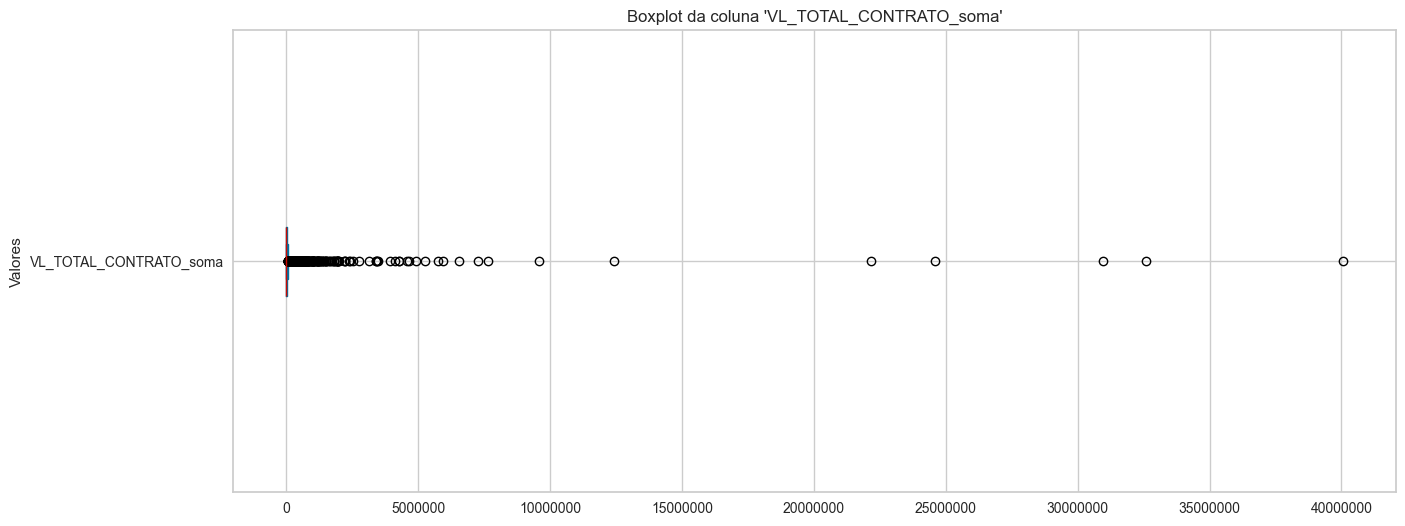

In [32]:
# Boxplot do valor total do contrato

plt.figure(figsize=(15, 6))
df_agrupado['VL_TOTAL_CONTRATO_soma'].plot.box(vert=False)
plt.title(f"Boxplot da coluna 'VL_TOTAL_CONTRATO_soma'")
plt.ylabel("Valores")
# Pega o eixo atual
ax = plt.gca()
# Formata os valores do eixo x como inteiros
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, _: int(val)))
plt.show()

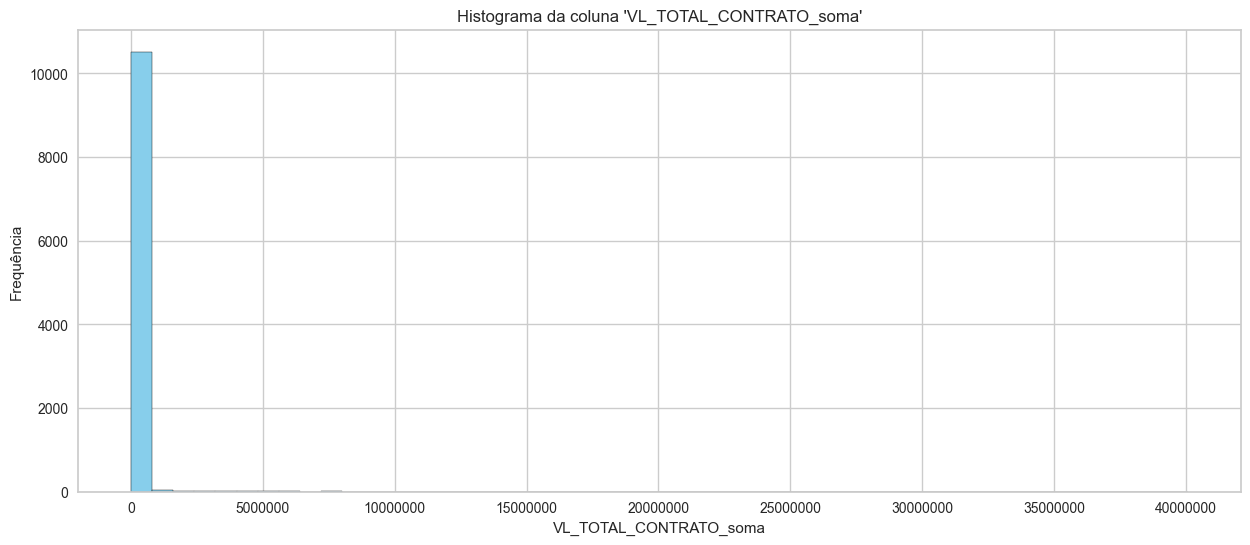

In [33]:
# Plotar histograma do valor total do contrato

plt.figure(figsize=(15, 6))
plt.hist(df_agrupado['VL_TOTAL_CONTRATO_soma'], bins=50, color="skyblue", edgecolor="black")
plt.xlabel('VL_TOTAL_CONTRATO_soma')
plt.ylabel("Frequência")
plt.title(f"Histograma da coluna 'VL_TOTAL_CONTRATO_soma'")
# Pega o eixo atual
ax = plt.gca()
# Formata os valores do eixo x como inteiros
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, _: int(val)))
plt.show()

In [34]:
# Percentual de outliers

# Quartis
Q1 = df_agrupado["VL_TOTAL_CONTRATO_soma"].quantile(0.25)
Q3 = df_agrupado["VL_TOTAL_CONTRATO_soma"].quantile(0.75)
IQR = Q3 - Q1

# Limites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Contar outliers
outliers_inferiores = df_agrupado[df_agrupado["VL_TOTAL_CONTRATO_soma"] < limite_inferior].shape[0]
outliers_superiores = df_agrupado[df_agrupado["VL_TOTAL_CONTRATO_soma"] > limite_superior].shape[0]
total = df_agrupado.shape[0]

# Percentual
percent_inferiores = outliers_inferiores / total * 100
percent_superiores = outliers_superiores / total * 100

print(f"Outliers inferiores: {percent_inferiores:.2f}%")
print(f"Outliers superiores: {percent_superiores:.2f}%")

Outliers inferiores: 0.00%
Outliers superiores: 13.18%


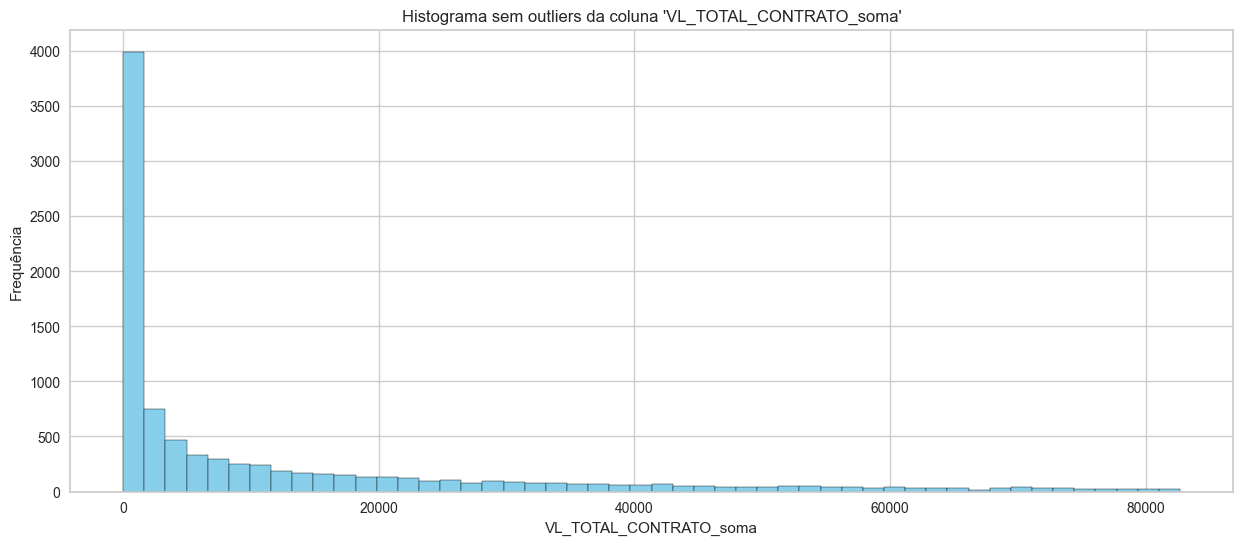

In [35]:
# Histograma sem outliers

plt.figure(figsize=(15, 6))
plt.hist(df_agrupado['VL_TOTAL_CONTRATO_soma'], bins=50, color="skyblue", edgecolor="black", range=(0, limite_superior))
plt.xlabel('VL_TOTAL_CONTRATO_soma')
plt.ylabel("Frequência")
plt.title(f"Histograma sem outliers da coluna 'VL_TOTAL_CONTRATO_soma'")
# Pega o eixo atual
ax = plt.gca()
# Formata os valores do eixo x como inteiros
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, _: int(val)))
plt.show()

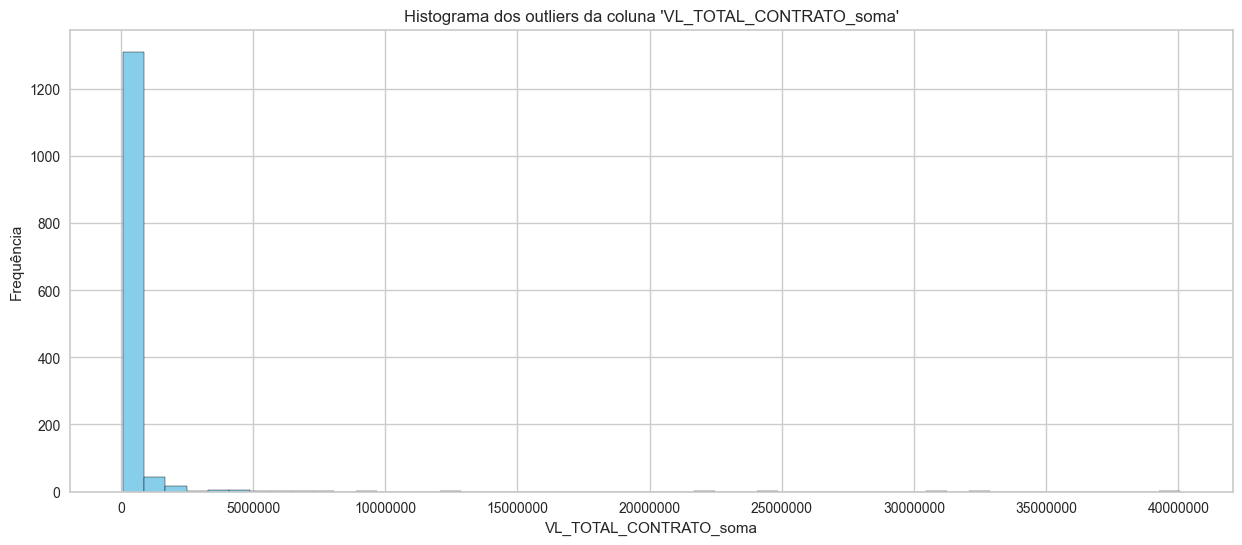

In [36]:
# Histograma dos outliers

max_valor = df_agrupado["VL_TOTAL_CONTRATO_soma"].max()

plt.figure(figsize=(15, 6))
plt.hist(df_agrupado['VL_TOTAL_CONTRATO_soma'], bins=50, color="skyblue", edgecolor="black", range=(limite_superior, max_valor))
plt.xlabel('VL_TOTAL_CONTRATO_soma')
plt.ylabel("Frequência")
plt.title(f"Histograma dos outliers da coluna 'VL_TOTAL_CONTRATO_soma'")
# Pega o eixo atual
ax = plt.gca()
# Formata os valores do eixo x como inteiros
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, _: int(val)))
plt.show()

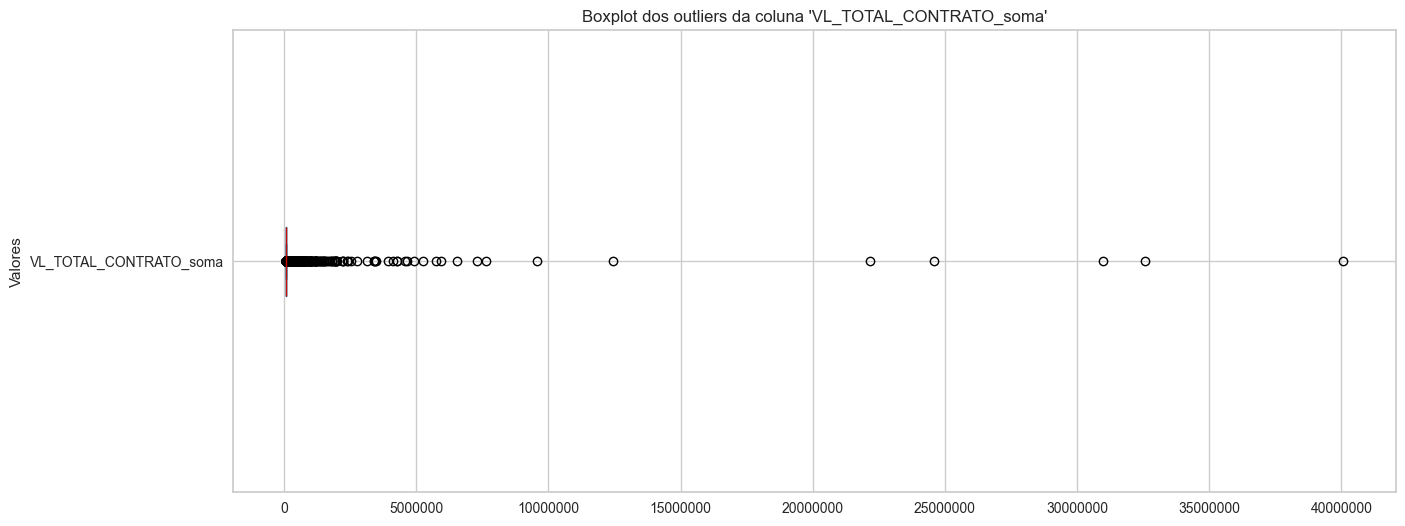

In [37]:
# Boxplot dos outliers

plt.figure(figsize=(15, 6))
df_agrupado['VL_TOTAL_CONTRATO_soma'].clip(limite_superior, max_valor).plot.box(vert=False)
plt.title(f"Boxplot dos outliers da coluna 'VL_TOTAL_CONTRATO_soma'")
plt.ylabel("Valores")
# Pega o eixo atual
ax = plt.gca()
# Formata os valores do eixo x como inteiros
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, _: int(val)))
plt.show()

## Criação de faixas de valor total dos contratos

In [38]:
# Dividindo os valores de contrato em faixas

# Definir o tamanho da faixa (1 milhão)
tamanho_faixa = 500_000

# Determinar valor máximo da coluna
max_valor = df_agrupado["VL_TOTAL_CONTRATO_soma"].max()

# Criar limites automaticamente: de 0 até o próximo milhão acima do máximo
limites = np.arange(0, max_valor + tamanho_faixa, tamanho_faixa)

# Criar rótulos das faixas
labels = [f"{int(l/500_000)*0.5}-{int(limites[i+1]/500_000)*0.5}M" for i, l in enumerate(limites[:-1])]

# Criar a coluna com as faixas
df_agrupado["faixa_vl_total_soma_contratos"] = pd.cut(df_agrupado["VL_TOTAL_CONTRATO_soma"], bins=limites, labels=labels, include_lowest=True)

In [39]:
# Exibindo o número de clientes por faixa

df_faixas_contrato = df_agrupado.groupby('faixa_vl_total_soma_contratos').agg({'CD_CLIENTE': 'count'})

df_faixas_contrato['percentual'] = df_faixas_contrato['CD_CLIENTE']/len(df_agrupado)*100

df_faixas_contrato

C:\Users\gxmar\AppData\Local\Temp\ipykernel_24976\1670929586.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_faixas_contrato = df_agrupado.groupby('faixa_vl_total_soma_contratos').agg({'CD_CLIENTE': 'count'})


,CD_CLIENTE,percentual
faixa_vl_total_soma_contratos,,
0.0-0.5M,10440,98.351390
0.5-1.0M,98,0.923222
1.0-1.5M,26,0.244936
1.5-2.0M,18,0.169571
2.0-2.5M,6,0.056524
...,...,...
38.0-38.5M,0,0.000000
38.5-39.0M,0,0.000000
39.0-39.5M,0,0.000000


In [40]:
percentual_nulos = df_agrupado.isnull().mean() * 100
percentual_nulos

CD_CLIENTE                       0.0
DS_PROD_moda                     0.0
DS_LIN_REC_moda                  0.0
CIDADE_moda                      0.0
DS_CNAE_moda                     0.0
DS_SEGMENTO_moda                 0.0
DS_SUBSEGMENTO_moda              0.0
MARCA_TOTVS_moda                 0.0
MODAL_COMERC_moda                0.0
PAIS_moda                        0.0
PERIODICIDADE_moda               0.0
UF_moda                          0.0
VL_TOTAL_CONTRATO_soma           0.0
faixa_vl_total_soma_contratos    0.0
dtype: float64

In [41]:
# Convertendo codigo do pais para string
df_agrupado['PAIS_moda'] = df_agrupado['PAIS_moda'].astype(str)

# Adicionando Dados de Outros Datasets

## clientes_desde

In [42]:
df_clientes_desde = pd.read_csv('../dados/dados_totvs/clientes_desde.csv', sep=';')

In [43]:
# Converter string -> datetime
df_clientes_desde["CLIENTE_DESDE"] = pd.to_datetime(
    df_clientes_desde["CLIENTE_DESDE"], format="%Y-%m-%d", errors="coerce"
)

In [44]:
# Calcular diferença em dias até hoje
df_clientes_desde["DIAS_CLIENTE"] = (
    pd.Timestamp.today().normalize() - df_clientes_desde["CLIENTE_DESDE"]
).dt.days.astype("Int64")  # Int64 aceita nulos

In [45]:
# excluir coluna original
df_clientes_desde = df_clientes_desde.drop("CLIENTE_DESDE", axis=1)

In [46]:
# Renomeando coluna de cliente para fazer o merge
df_clientes_desde.rename(columns={"CLIENTE": "CD_CLIENTE"}, inplace=True)

In [47]:
# Fazendo o merge dos dataframes
df_agrupado = pd.merge(
    df_agrupado, 
    df_clientes_desde, 
    on="CD_CLIENTE",   # chave comum
    how="left"        # tipo de junção
)

In [48]:
# conferindo nulos na nova coluna
df_agrupado['DIAS_CLIENTE'].isnull().sum()

np.int64(0)

## contratacoes_ultimos_12_meses

In [49]:
df_contratacoes_ultimos_12_meses = pd.read_csv('../dados/dados_totvs/contratacoes_ultimos_12_meses.csv', sep=';')

In [50]:
df_contratacoes_ultimos_12_meses

,CD_CLIENTE,QTD_CONTRATACOES_12M,VLR_CONTRATACOES_12M
0,T07544,1,"2104,64437581956"
1,T01872,2,"0,00840771473583952"
2,T05174,3,"1777,9121734701"
3,T01670,2,"2934,85996355266"
4,T02817,2,"4207,2204538141"
...,...,...,...
4309,TFEEKZ,1,"615,865104400245"
4310,TFEE28,1,"22071,8780743801"
4311,TFEEUL,1,"616,853010881706"
4312,TFEEPI,1,"615,865104400245"


In [51]:
# Convertendo valores monetarios para floar/int
df_contratacoes_ultimos_12_meses['VLR_CONTRATACOES_12M'] = df_contratacoes_ultimos_12_meses['VLR_CONTRATACOES_12M'].str.replace(",", ".").astype(float)

In [52]:
# Renomeando coluna de cliente para fazer o merge
df_agrupado = pd.merge(
    df_agrupado, 
    df_contratacoes_ultimos_12_meses, 
    on="CD_CLIENTE",   # chave comum
    how="left"        # tipo de junção
)

In [53]:
# conferindo nulos nas novas colunas
df_agrupado[['QTD_CONTRATACOES_12M', 'VLR_CONTRATACOES_12M']].isnull().sum()

QTD_CONTRATACOES_12M    6301
VLR_CONTRATACOES_12M    6301
dtype: int64

In [58]:
df_contratacoes_ultimos_12_meses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4314 entries, 0 to 4313
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CD_CLIENTE            4314 non-null   object 
 1   QTD_CONTRATACOES_12M  4314 non-null   int64  
 2   VLR_CONTRATACOES_12M  4314 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 101.2+ KB


In [56]:
df_agrupado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10615 entries, 0 to 10614
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   CD_CLIENTE                     10615 non-null  object  
 1   DS_PROD_moda                   10615 non-null  object  
 2   DS_LIN_REC_moda                10615 non-null  object  
 3   CIDADE_moda                    10615 non-null  object  
 4   DS_CNAE_moda                   10615 non-null  object  
 5   DS_SEGMENTO_moda               10615 non-null  object  
 6   DS_SUBSEGMENTO_moda            10615 non-null  object  
 7   MARCA_TOTVS_moda               10615 non-null  object  
 8   MODAL_COMERC_moda              10615 non-null  object  
 9   PAIS_moda                      10615 non-null  object  
 10  PERIODICIDADE_moda             10615 non-null  object  
 11  UF_moda                        10615 non-null  object  
 12  VL_TOTAL_CONTRATO_soma         1

In [55]:
# Preenchendo os valores nulos com 0

df_agrupado[["QTD_CONTRATACOES_12M", "VLR_CONTRATACOES_12M"]] = (
    df_agrupado[["QTD_CONTRATACOES_12M", "VLR_CONTRATACOES_12M"]].fillna(0)
)

In [55]:
df_agrupado

,CD_CLIENTE,DS_PROD_moda,DS_LIN_REC_moda,CIDADE_moda,DS_CNAE_moda,DS_SEGMENTO_moda,DS_SUBSEGMENTO_moda,MARCA_TOTVS_moda,MODAL_COMERC_moda,PAIS_moda,PERIODICIDADE_moda,UF_moda,VL_TOTAL_CONTRATO_soma,faixa_vl_total_soma_contratos,DIAS_CLIENTE,QTD_CONTRATACOES_12M,VLR_CONTRATACOES_12M
0,99069,CLOUD IAAS 36M,SAAS SERIE T,SAOPAULO,COMERCIO VAREJISTA ESPECIALIZADO DE EQUIPAMENT...,VAREJO,VAREJO,CLOUD,MODALIDADE ASSINATURA COMPLEMENTAR,105,00 - Mensal,SP,8.120772e+03,0.0-0.5M,2943,0.0,0.000000
1,99958,ADESAO TOTVS P,SAAS SMS ALUGUEL,JOINVILLE,PESSOA FISICA (SEM CNAE),SERVICOS,PROVEDOR SERVICOS,CROSS - TRADICIONAL,MODALIDADE ALUGUEL (LEGADO),105,00 - Mensal,SC,1.634142e+06,1.5-2.0M,3454,0.0,0.000000
2,99999,CR.WN06.CsA,CDU TOTVS SERIE T,SAOPAULO,Desenvolvimento de programas de computador sob...,TOTVS,TOTVS,MODALIDADE TRADICIONAL,MODALIDADE TRADICIONAL,105,00 - Mensal,SP,4.271960e+01,0.0-0.5M,7037,0.0,0.000000
3,CARAMU,ADESAO OT LOG PLA 500 VIAGENS,CDU TOTVS SERIE T,ITUMBIARA,"Fabricacao de oleos vegetais refinados, exceto...",MANUFATURA,BENS DE CONSUMO,OTIMIZACAO LOGISTICA,MODALIDADE ASSINATURA COMPLEMENTAR,105,00 - Mensal,GO,8.531457e+04,0.0-0.5M,1192,0.0,0.000000
4,T00018,CDU LGT G CAP HUMANO TRAD,CDU TOTVS SERIE T,SAOPAULO,Hoteis,SERVICOS,VIAGENS,HOSPITALIDADE - CORE,MODALIDADE TRADICIONAL,105,00 - Mensal,SP,2.051230e+02,0.0-0.5M,8664,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10610,TFEEXW,05 IDS FLUIG PLATAFORMA,SAAS INTERA SOFTWARE,BELOHORIZONTE,"Atividades de atendimento hospitalar, exceto p...",SAUDE,HOSPITAIS,RH - CORE,MODALIDADE ASSINATURA COMPLEMENTAR,105,00 - Mensal,MG,3.041294e+04,0.0-0.5M,184,2.0,30412.949059
10611,TFEEYC,TEF TOTVS CLOUD PDV PRINCIPAL,SAAS TEF,GOIANIA,Comercio varejista de calcados,VAREJO,MODA,DISTRIBUICAO & VAREJO - CORE,MODALIDADE ASSINATURA COMPLEMENTAR,105,00 - Mensal,GO,6.010675e+01,0.0-0.5M,181,1.0,60.106753
10612,TFEEYH,CONS SAT OU MFE BALANC SUBSC,SAAS SERIE T,ITAITINGA,"Comercio varejista de mercadorias em geral, co...",VAREJO,SUPERMERCADO,SUPERMERCADOS - CORE,MODALIDADE ASSINATURA COMPLEMENTAR,105,00 - Mensal,CE,3.600225e+02,0.0-0.5M,181,1.0,360.022549
10613,TFEEYP,ALMOXARIFADO E ESTOQUE,SAAS CMNET HOTAL,CANELA,Hoteis,HOSPITALITY,HOSPEDAGEM,HOSPITALIDADE - CORE,MODALIDADE ASSINATURA COMPLEMENTAR,105,00 - Mensal,RS,1.705934e+03,0.0-0.5M,181,1.0,1705.933728


## mrr

In [55]:
df_mrr = pd.read_csv('../dados/dados_totvs/mrr.csv', sep=';')

In [56]:
df_mrr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7309 entries, 0 to 7308
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CLIENTE  7309 non-null   object 
 1   MRR_12M  7309 non-null   float64
dtypes: float64(1), object(1)
memory usage: 114.3+ KB


In [57]:
df_mrr.nunique()

CLIENTE    7309
MRR_12M    7151
dtype: int64

In [58]:
# Renomeando coluna de cliente para fazer o merge
df_mrr.rename(columns={"CLIENTE": "CD_CLIENTE"}, inplace=True)

In [59]:
# Fazendo o merge dos dataframes
df_agrupado = pd.merge(
    df_agrupado, 
    df_mrr, 
    on="CD_CLIENTE",   # chave comum
    how="left"        # tipo de junção
)

In [60]:
# conferindo nulos nas novas colunas
df_agrupado['MRR_12M'].isnull().sum()

np.int64(3306)

In [61]:
# Percentual de nulos na coluna MRR_12M
df_agrupado['MRR_12M'].isnull().sum()/len(df_agrupado) * 100

np.float64(31.144606688648143)

## nps_relacional

In [62]:
df_nps_relacional = pd.read_csv('../dados/dados_totvs/nps_relacional.csv', sep=';')

In [63]:
df_nps_relacional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14143 entries, 0 to 14142
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   respondedAt                14143 non-null  object 
 1   metadata_codcliente        14143 non-null  object 
 2   resposta_NPS               14143 non-null  int64  
 3   resposta_unidade           11311 non-null  float64
 4   Nota_SupTec_Agilidade      8067 non-null   float64
 5   Nota_SupTec_Atendimento    7161 non-null   float64
 6   Nota_Comercial             6907 non-null   float64
 7   Nota_Custos                7504 non-null   float64
 8   Nota_AdmFin_Atendimento    6494 non-null   float64
 9   Nota_Software              5821 non-null   float64
 10  Nota_Software_Atualizacao  7435 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 1.2+ MB


In [64]:
# Removendo data de resposta (sem importancia para a clusterização)
df_nps_relacional = df_nps_relacional.drop('respondedAt', axis=1)

In [65]:
# agrupando por cliente e pegando a mediana (mais robusta que a média)
df_nps_relacional_agrupado = df_nps_relacional.groupby('metadata_codcliente').agg('median').reset_index()

In [66]:
# Renomeando coluna de cliente para fazer o merge
df_nps_relacional_agrupado.rename(columns={"metadata_codcliente": "CD_CLIENTE"}, inplace=True)

In [67]:
# verificando nulos
df_nps_relacional_agrupado.isnull().sum()/len(df_nps_relacional_agrupado) * 100

CD_CLIENTE                    0.000000
resposta_NPS                  0.000000
resposta_unidade              7.610037
Nota_SupTec_Agilidade        14.232826
Nota_SupTec_Atendimento      18.120115
Nota_Comercial               21.596051
Nota_Custos                  17.667626
Nota_AdmFin_Atendimento      23.220897
Nota_Software                27.519539
Nota_Software_Atualizacao    18.901687
dtype: float64

In [68]:
# Preenchendo os valores nulos com a mediana da resposta NPS

colunas_para_preencher = df_nps_relacional_agrupado.columns.drop(['CD_CLIENTE', 'resposta_NPS']).tolist()

In [69]:
# Preenchendo os valores nulos com a mediana da resposta NPS

for coluna in colunas_para_preencher:
    df_nps_relacional_agrupado[coluna] = df_nps_relacional_agrupado[coluna].fillna(df_nps_relacional_agrupado["resposta_NPS"])

In [70]:
df_nps_relacional_agrupado.describe()

,resposta_NPS,resposta_unidade,Nota_SupTec_Agilidade,Nota_SupTec_Atendimento,Nota_Comercial,Nota_Custos,Nota_AdmFin_Atendimento,Nota_Software,Nota_Software_Atualizacao
count,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000,4862.000000
mean,8.232517,8.268305,7.571370,8.054607,8.365693,7.099342,8.256376,7.917524,8.004731
std,1.695735,1.781280,1.877236,1.758352,1.827739,1.899259,1.810742,1.998067,1.830219
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,8.000000,7.000000,7.000000,8.000000,6.000000,8.000000,7.000000,7.000000
50%,8.500000,8.500000,8.000000,8.000000,9.000000,7.500000,8.500000,8.000000,8.000000
75%,9.500000,9.500000,9.000000,9.000000,10.000000,8.000000,10.000000,9.000000,9.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [71]:
# Arredondando valores float para 2 casas decimais

cols_float = df_nps_relacional_agrupado.select_dtypes(include='float').columns
df_nps_relacional_agrupado[cols_float] = df_nps_relacional_agrupado[cols_float].round(2)

In [72]:
# Agora sim, fazendo o merge dos dataframes

df_agrupado = pd.merge(
    df_agrupado, 
    df_nps_relacional_agrupado, 
    on="CD_CLIENTE",   # chave comum
    how="left"        # tipo de junção
)

## telemetria

In [ ]:
df_telemetria = pd.read_csv('../dados/dados_tratados_v0/telemetria_clusterizado.csv', sep=';')

FileNotFoundError: [Errno 2] No such file or directory: '../dados/dados_totvs/telemetria_clusterizado.csv'

In [ ]:
df_telemetria

,CD_CLIENTE,CLUSTER_TELEMETRIA
0,T00053,3
1,T00082,3
2,T00145,0
3,T00245,0
4,T00255,2
...,...,...
4460,TFEE30,4
4461,TFEE44,0
4462,TFEE47,0
4463,TFEEAA,2


In [ ]:
# Merge dos dataframes
df_agrupado = pd.merge(
    df_agrupado, 
    df_telemetria, 
    on="CD_CLIENTE",   # chave comum
    how="left"        # tipo de junção
)

# Tratamento Final

In [ ]:
df_agrupado.columns

Index(['CD_CLIENTE', 'DS_PROD_moda', 'DS_LIN_REC_moda', 'CIDADE_moda',
       'DS_CNAE_moda', 'DS_SEGMENTO_moda', 'DS_SUBSEGMENTO_moda',
       'MARCA_TOTVS_moda', 'MODAL_COMERC_moda', 'PAIS_moda',
       'PERIODICIDADE_moda', 'UF_moda', 'VL_TOTAL_CONTRATO_soma',
       'faixa_vl_total_soma_contratos', 'DIAS_CLIENTE', 'QTD_CONTRATACOES_12M',
       'VLR_CONTRATACOES_12M', 'MRR_12M', 'resposta_NPS', 'resposta_unidade',
       'Nota_SupTec_Agilidade', 'Nota_SupTec_Atendimento', 'Nota_Comercial',
       'Nota_Custos', 'Nota_AdmFin_Atendimento', 'Nota_Software',
       'Nota_Software_Atualizacao', 'CLUSTER_TELEMETRIA'],
      dtype='object')

In [ ]:
# últiuma conferida de nulos
df_agrupado.isnull().sum()/len(df_agrupado) * 100

CD_CLIENTE                        0.000000
DS_PROD_moda                      0.000000
DS_LIN_REC_moda                   0.000000
CIDADE_moda                       0.000000
DS_CNAE_moda                      0.000000
DS_SEGMENTO_moda                  0.000000
DS_SUBSEGMENTO_moda               0.000000
MARCA_TOTVS_moda                  0.000000
MODAL_COMERC_moda                 0.000000
PAIS_moda                         0.000000
PERIODICIDADE_moda                0.000000
UF_moda                           0.000000
VL_TOTAL_CONTRATO_soma            0.000000
faixa_vl_total_soma_contratos     0.000000
DIAS_CLIENTE                      0.000000
QTD_CONTRATACOES_12M              0.000000
VLR_CONTRATACOES_12M              0.000000
MRR_12M                          31.144607
resposta_NPS                     54.206312
resposta_unidade                 54.206312
Nota_SupTec_Agilidade            54.206312
Nota_SupTec_Atendimento          54.206312
Nota_Comercial                   54.206312
Nota_Custos

In [ ]:
# Dropando colunas com muitos nulos

df_agrupado = df_agrupado.drop(['MRR_12M', 'resposta_NPS', 'resposta_unidade',
       'Nota_SupTec_Agilidade', 'Nota_SupTec_Atendimento', 'Nota_Comercial',
       'Nota_Custos', 'Nota_AdmFin_Atendimento', 'Nota_Software',
       'Nota_Software_Atualizacao', 'CLUSTER_TELEMETRIA'], axis=1)

In [75]:
# Criando df para controle
df_agrupado_2 = df_agrupado.copy()

In [ ]:
# Preencher para normalizar ou nao
normalizar = False

In [ ]:
# Normalizar colunas numéricas

if normalizar:
    for coluna in df_agrupado.select_dtypes(include=['float64', 'int64']).columns:
        if coluna != 'CD_CLIENTE':  # Não normalizar a chave
            df_agrupado[[coluna]] = MinMaxScaler().fit_transform(df_agrupado[[coluna]])

In [76]:
df_agrupado

,CD_CLIENTE,DS_PROD_moda,DS_LIN_REC_moda,CIDADE_moda,DS_CNAE_moda,DS_SEGMENTO_moda,DS_SUBSEGMENTO_moda,MARCA_TOTVS_moda,MODAL_COMERC_moda,PAIS_moda,PERIODICIDADE_moda,UF_moda,VL_TOTAL_CONTRATO_soma,faixa_vl_total_soma_contratos,DIAS_CLIENTE,QTD_CONTRATACOES_12M,VLR_CONTRATACOES_12M
0,99069,CLOUD IAAS 36M,SAAS SERIE T,SAOPAULO,COMERCIO VAREJISTA ESPECIALIZADO DE EQUIPAMENT...,VAREJO,VAREJO,CLOUD,MODALIDADE ASSINATURA COMPLEMENTAR,105,00 - Mensal,SP,8.120772e+03,0.0-0.5M,2943,0.0,0.000000
1,99958,ADESAO TOTVS P,SAAS SMS ALUGUEL,JOINVILLE,PESSOA FISICA (SEM CNAE),SERVICOS,PROVEDOR SERVICOS,CROSS - TRADICIONAL,MODALIDADE ALUGUEL (LEGADO),105,00 - Mensal,SC,1.634142e+06,1.5-2.0M,3454,0.0,0.000000
2,99999,CR.WN06.CsA,CDU TOTVS SERIE T,SAOPAULO,Desenvolvimento de programas de computador sob...,TOTVS,TOTVS,MODALIDADE TRADICIONAL,MODALIDADE TRADICIONAL,105,00 - Mensal,SP,4.271960e+01,0.0-0.5M,7037,0.0,0.000000
3,CARAMU,ADESAO OT LOG PLA 500 VIAGENS,CDU TOTVS SERIE T,ITUMBIARA,"Fabricacao de oleos vegetais refinados, exceto...",MANUFATURA,BENS DE CONSUMO,OTIMIZACAO LOGISTICA,MODALIDADE ASSINATURA COMPLEMENTAR,105,00 - Mensal,GO,8.531457e+04,0.0-0.5M,1192,0.0,0.000000
4,T00018,CDU LGT G CAP HUMANO TRAD,CDU TOTVS SERIE T,SAOPAULO,Hoteis,SERVICOS,VIAGENS,HOSPITALIDADE - CORE,MODALIDADE TRADICIONAL,105,00 - Mensal,SP,2.051230e+02,0.0-0.5M,8664,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10610,TFEEXW,05 IDS FLUIG PLATAFORMA,SAAS INTERA SOFTWARE,BELOHORIZONTE,"Atividades de atendimento hospitalar, exceto p...",SAUDE,HOSPITAIS,RH - CORE,MODALIDADE ASSINATURA COMPLEMENTAR,105,00 - Mensal,MG,3.041294e+04,0.0-0.5M,184,2.0,30412.949059
10611,TFEEYC,TEF TOTVS CLOUD PDV PRINCIPAL,SAAS TEF,GOIANIA,Comercio varejista de calcados,VAREJO,MODA,DISTRIBUICAO & VAREJO - CORE,MODALIDADE ASSINATURA COMPLEMENTAR,105,00 - Mensal,GO,6.010675e+01,0.0-0.5M,181,1.0,60.106753
10612,TFEEYH,CONS SAT OU MFE BALANC SUBSC,SAAS SERIE T,ITAITINGA,"Comercio varejista de mercadorias em geral, co...",VAREJO,SUPERMERCADO,SUPERMERCADOS - CORE,MODALIDADE ASSINATURA COMPLEMENTAR,105,00 - Mensal,CE,3.600225e+02,0.0-0.5M,181,1.0,360.022549
10613,TFEEYP,ALMOXARIFADO E ESTOQUE,SAAS CMNET HOTAL,CANELA,Hoteis,HOSPITALITY,HOSPEDAGEM,HOSPITALIDADE - CORE,MODALIDADE ASSINATURA COMPLEMENTAR,105,00 - Mensal,RS,1.705934e+03,0.0-0.5M,181,1.0,1705.933728


In [111]:
df_agrupado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10615 entries, 0 to 10614
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   CD_CLIENTE                     10615 non-null  object  
 1   DS_PROD_moda                   10615 non-null  object  
 2   DS_LIN_REC_moda                10615 non-null  object  
 3   CIDADE_moda                    10615 non-null  object  
 4   DS_CNAE_moda                   10615 non-null  object  
 5   DS_SEGMENTO_moda               10615 non-null  object  
 6   DS_SUBSEGMENTO_moda            10615 non-null  object  
 7   MARCA_TOTVS_moda               10615 non-null  object  
 8   MODAL_COMERC_moda              10615 non-null  object  
 9   PAIS_moda                      10615 non-null  object  
 10  PERIODICIDADE_moda             10615 non-null  object  
 11  UF_moda                        10615 non-null  object  
 12  VL_TOTAL_CONTRATO_soma         1

# Avaliando o Número Inicial de K para Kmeans

In [112]:
# Função para exibir as diferentes avaliações para o número de clusters

def define_numero_clusters(x):
    # Elbow method
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(1,30))
    visualizer.fit(x)
    visualizer.show()

    # Silhouette method
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(2,30), metric='silhouette', timings=True)
    visualizer.fit(x)
    visualizer.show()

    # Calinski harabaz method
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(2,30), metric='calinski_harabasz', timings=True)
    visualizer.fit(x)
    visualizer.show()

In [113]:
# Rodando algoritmo para definição de k

features = df_agrupado.columns.tolist()
features.remove('CD_CLIENTE')

x = df_agrupado[features].values

#define_numero_clusters(x)

# Pipeline de Clusterização com Kprototype

## Definindo funções

In [114]:
# Função para visualização dos clusters
def visualiza_clusters(x, labels):
    #PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(x)
    plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='Set2', s=50)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Clusters (PCA)")
    plt.show()

    # TSNE
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(x)
    plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels, cmap='Set2', s=50)
    plt.title("Clusters (t-SNE)")
    plt.show()

In [115]:
# Função para visualização da distribuiçlão dos valores de cada coluna por cluster

def visualiza_colunas_por_cluster(df, k):
    colunas_graficos = ['faixa_vl_total_soma_contratos', 'DS_SEGMENTO_moda', 'UF_moda']
    colunas_histograma = ['DIAS_CLIENTE', 'VLR_CONTRATACOES_12M']  # ajuste conforme necessário

    # Gráficos de barras empilhados (1x3)
    fig_bar, axes_bar = plt.subplots(len(colunas_graficos), 1, figsize=(15, 5 * len(colunas_graficos)))
    if len(colunas_graficos) == 1:
        axes_bar = [axes_bar]
    for i, coluna in enumerate(colunas_graficos):
        contagem = pd.crosstab(df[coluna], df[f"cluster_{k}"])
        contagem.plot(kind="bar", stacked=True, colormap="Set2", ax=axes_bar[i])
        axes_bar[i].set_xlabel(coluna)
        axes_bar[i].set_ylabel("Contagem")
        axes_bar[i].set_title(f"Contagem de {coluna} por cluster para k={k}")
        axes_bar[i].legend(title="Cluster")
    plt.tight_layout()
    plt.show()

    # Histogramas empilhados (1x2)
    fig_hist, axes_hist = plt.subplots(len(colunas_histograma), 1, figsize=(15, 5 * len(colunas_histograma)))
    if len(colunas_histograma) == 1:
        axes_hist = [axes_hist]
    # Escolha o colormap
    cmap = cm.get_cmap('Set2', len(df[f'cluster_{k}'].unique()))
    colors = [cmap(i) for i in range(len(df[f'cluster_{k}'].unique()))]

    for j, coluna in enumerate(colunas_histograma):
        for idx, cluster in enumerate(sorted(df[f'cluster_{k}'].unique())):
            subset = df[df[f'cluster_{k}'] == cluster][coluna]
            axes_hist[j].hist(subset, bins=50, alpha=0.8, label=f'Cluster {cluster}', color=colors[idx])
        axes_hist[j].set_title(f'Histograma de {coluna} por cluster para k={k}')
        axes_hist[j].set_xlabel(coluna)
        axes_hist[j].set_ylabel('Frequência')
        axes_hist[j].legend()
    plt.tight_layout()
    plt.show()

In [116]:
# Função para exibir a contagem do número de clientes e valor total dos contratos
def mostra_contagem_clientes_casos(df, k):
    df_contagem_clientes_casos = df.groupby(f'cluster_{k}').agg({
        'CD_CLIENTE': 'count',
        'VL_TOTAL_CONTRATO_soma': ['sum', 'mean']
    }).reset_index()
    df_contagem_clientes_casos.columns = [f'cluster_{k}', 'numero_clientes', 'valor_total_contratos', 'media_total_contratos']
    with pd.option_context('display.float_format', '{:.2f}'.format):
        print(df_contagem_clientes_casos)

In [117]:
# Função para clusterazação com kprototype
def clusterização_kproto(x, k, init, categorical, max_iter=100):
    kproto = KPrototypes(n_clusters=k, init=init, max_iter=max_iter, verbose=1, random_state=42)
    kproto.fit(x, categorical=categorical)
    labels = kproto.labels_
    cluster_pred = kproto.predict(x, categorical=categorical)

    return kproto, labels, cluster_pred

In [118]:
# Função para avaliadção da clusterização do kprototype - a avaliação exige apenas valores numéricos
def avaliacao_clusterizacao_kproto(x, labels):
    # Cria uma cópia para não alterar o original
    x_temp = x.drop('CD_CLIENTE', axis=1).copy()
    # Identifica colunas categóricas (object ou category)
    colunas_categoricas = x_temp.select_dtypes(include=['object', 'category']).columns
    # Aplica frequency encoding nas colunas categóricas
    for coluna in colunas_categoricas:
        freq = x_temp[coluna].value_counts(normalize=True)
        x_temp[coluna] = x_temp[coluna].map(freq)
    # Calcula as métricas usando apenas valores numéricos
    x_numerico = x_temp.select_dtypes(include=[np.number])
    score = silhouette_score(x_numerico, labels)
    db_index = davies_bouldin_score(x_numerico, labels)
    ch_index = calinski_harabasz_score(x_numerico, labels)
    return score, db_index, ch_index

In [119]:
# Função para alimentar dataframe da avaliação da clusterização
def alimenta_df_avaliacao_clusterizacao_kproto(df_avaliacao, k, init, score, db_index, ch_index):
    df_avaliacao.loc[len(df_avaliacao)] = [k, init, score, db_index, ch_index]

## Criando dataset

In [120]:
# Criando dataset do modelo e transformando a coluna CD_CLIENTE em numérica para usar no KPrototypes

# Criando o dataset para alimentar o modelo
x = df_agrupado.copy()
# Transformando a coluna CD_CLIENTE em numérica para usar no KPrototypes
x['CD_CLIENTE'], id_map = pd.factorize(x['CD_CLIENTE'])

## Definindo k máximo

In [121]:
# Definindo limite de k e parametros para teste

###############################################
k_max = 6
###############################################

valores_k = list(range(3, (k_max+1))) # min. 3 clusters
lista_init = ["Cao"] # "Huang"

## Tratando colunas categóricas

In [122]:
# Transformando colunas de objetos em categoricas
for col in x.select_dtypes(include=['object']).columns:
    x[col] = x[col].astype('category')

In [123]:
# Separando colunas categoricas
categorical_idx = [x.columns.get_loc(col) for col in x.select_dtypes(include=['category']).columns]

## Clusterização


Clusterização com k=3:

Clusterização com k=3, init=Cao
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 237, ncost: 2569323693262786.0
Run: 1, iteration: 2/100, moves: 295, ncost: 1165165769980283.2
Run: 1, iteration: 3/100, moves: 151, ncost: 645947701635041.9
Run: 1, iteration: 4/100, moves: 44, ncost: 583523772423702.5
Run: 1, iteration: 5/100, moves: 15, ncost: 564223839242124.8
Run: 1, iteration: 6/100, moves: 11, ncost: 546034214411213.75
Run: 1, iteration: 7/100, moves: 5, ncost: 541339759866186.8
Run: 1, iteration: 8/100, moves: 0, ncost: 541339759866186.8
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 36, ncost: 1841327840253301.2
Run: 2, iteration: 2/100, move

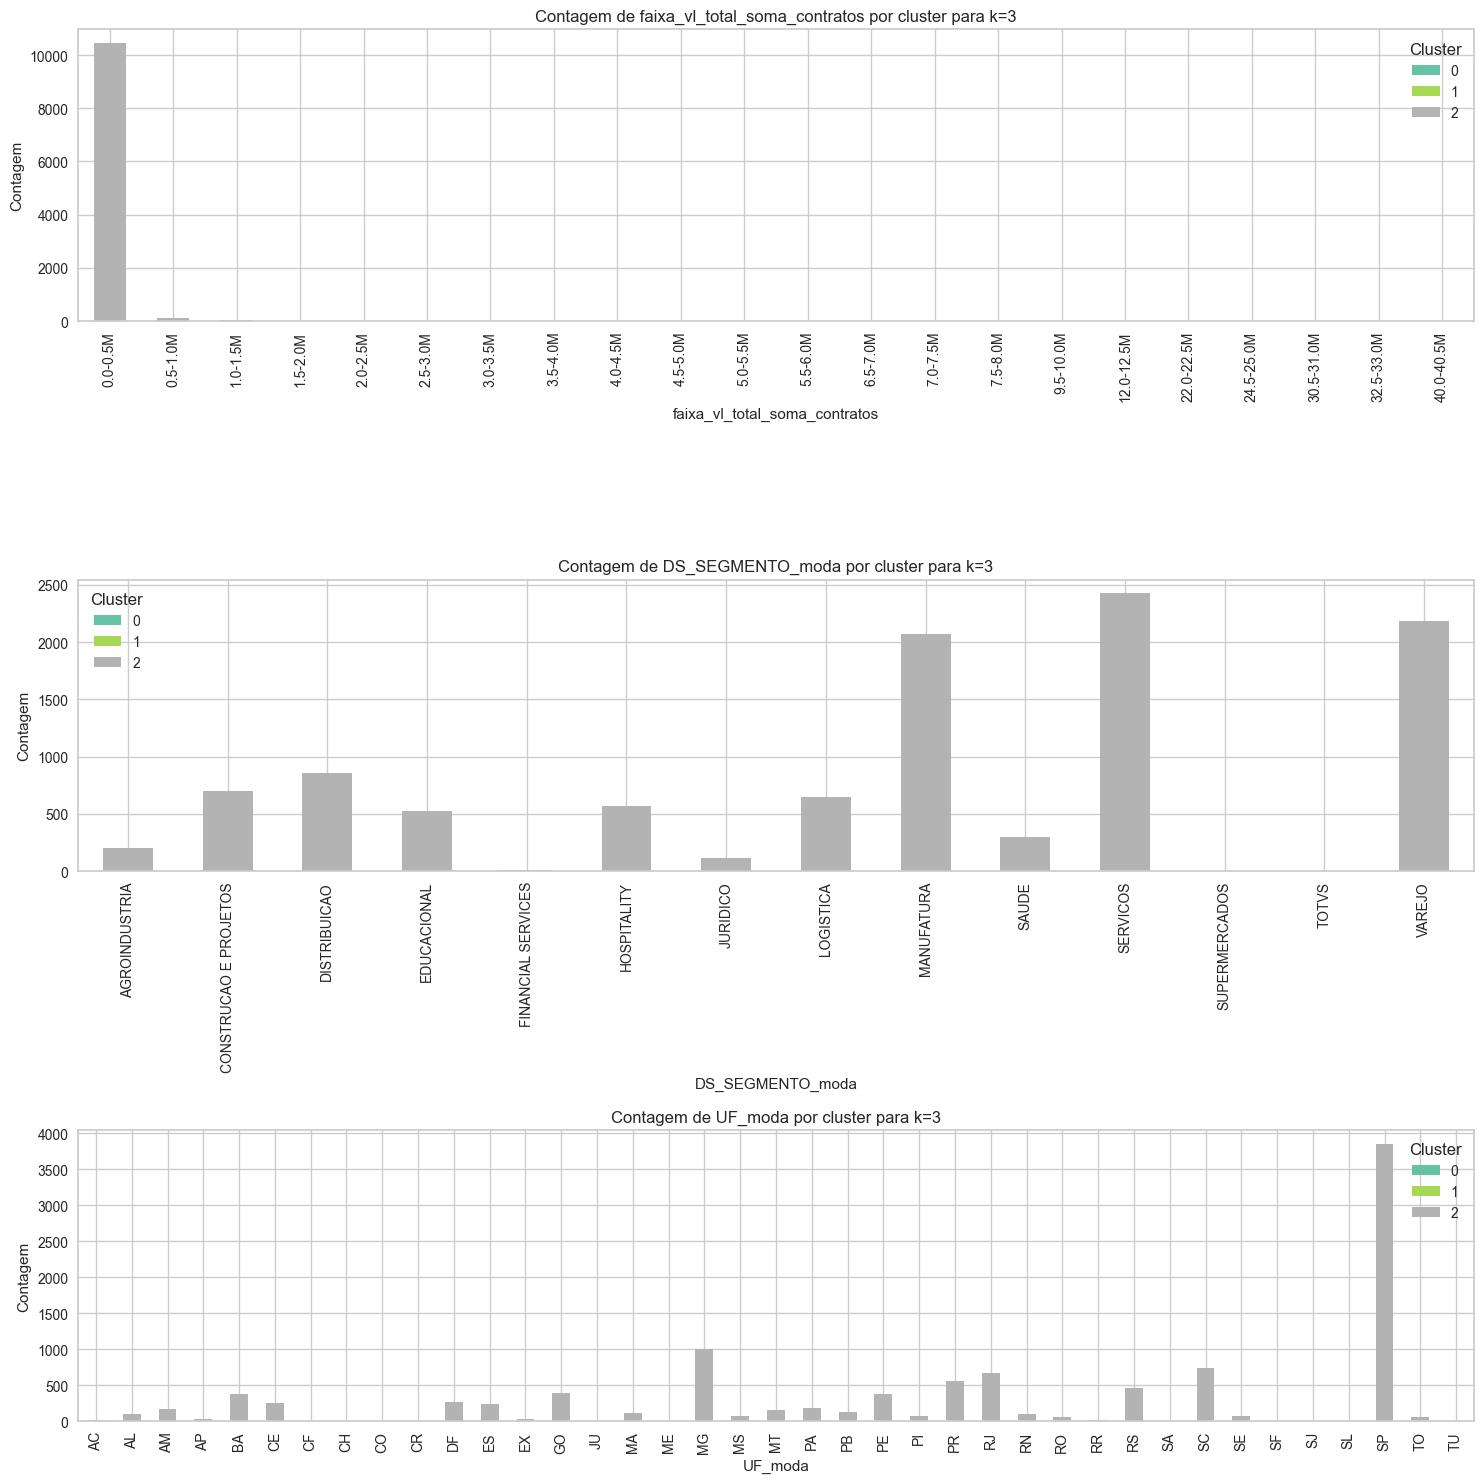

C:\Users\gxmar\AppData\Local\Temp\ipykernel_19268\2192882888.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Set2', len(df[f'cluster_{k}'].unique()))


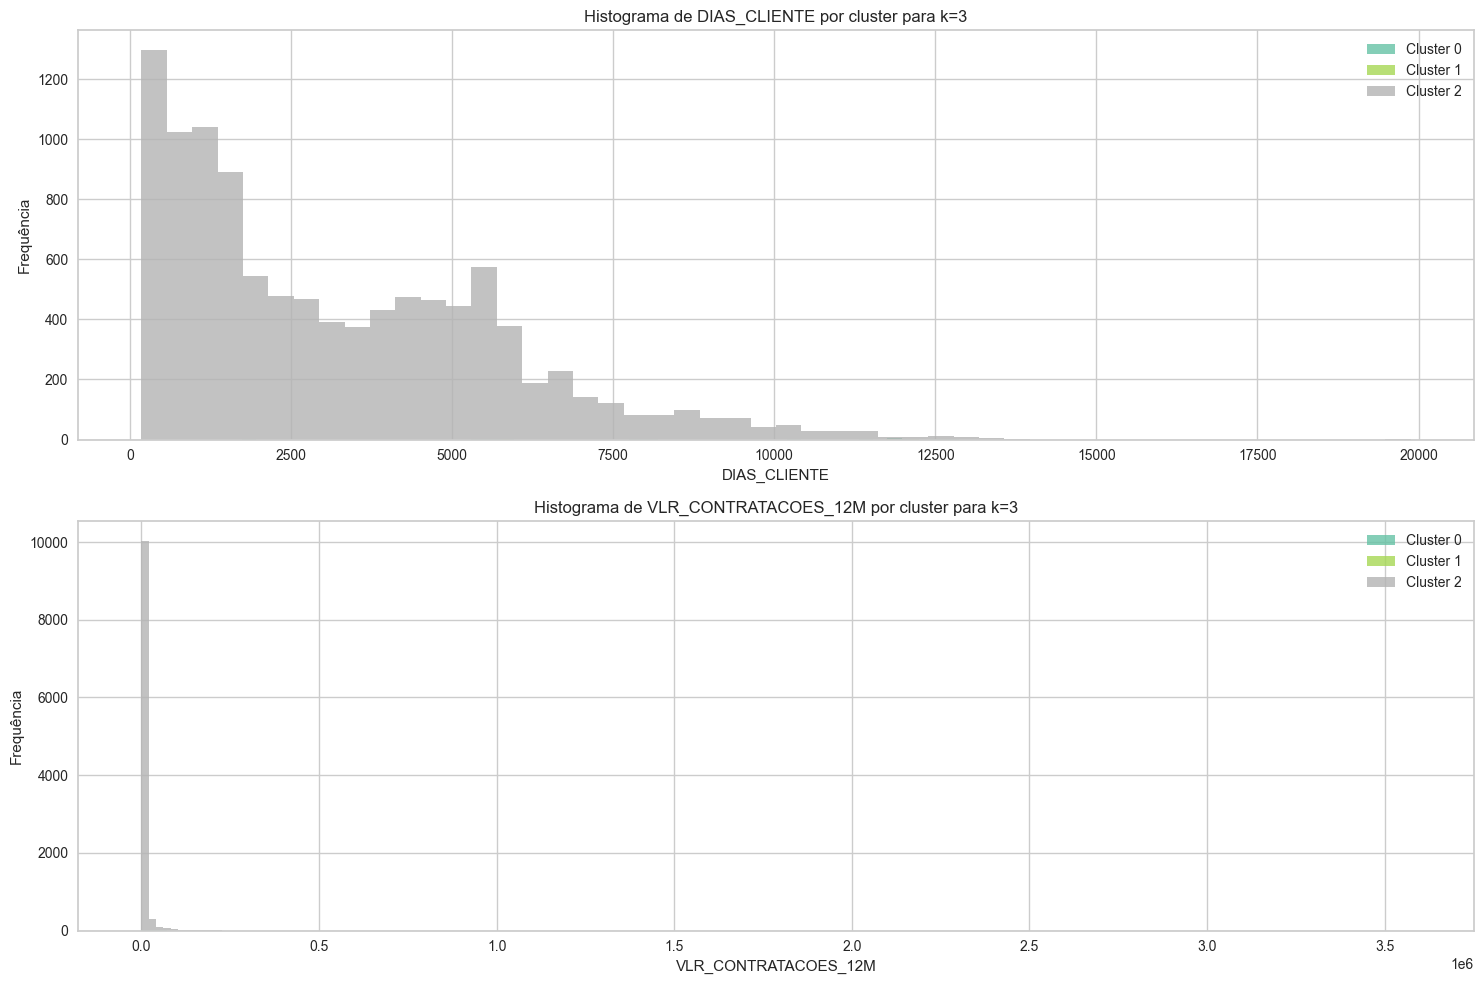


Clusterização com k=4:

Clusterização com k=4, init=Cao
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 208, ncost: 2113634563311169.0
Run: 1, iteration: 2/100, moves: 92, ncost: 535506313269301.94
Run: 1, iteration: 3/100, moves: 75, ncost: 413606404068811.8
Run: 1, iteration: 4/100, moves: 70, ncost: 410549981599370.7
Run: 1, iteration: 5/10

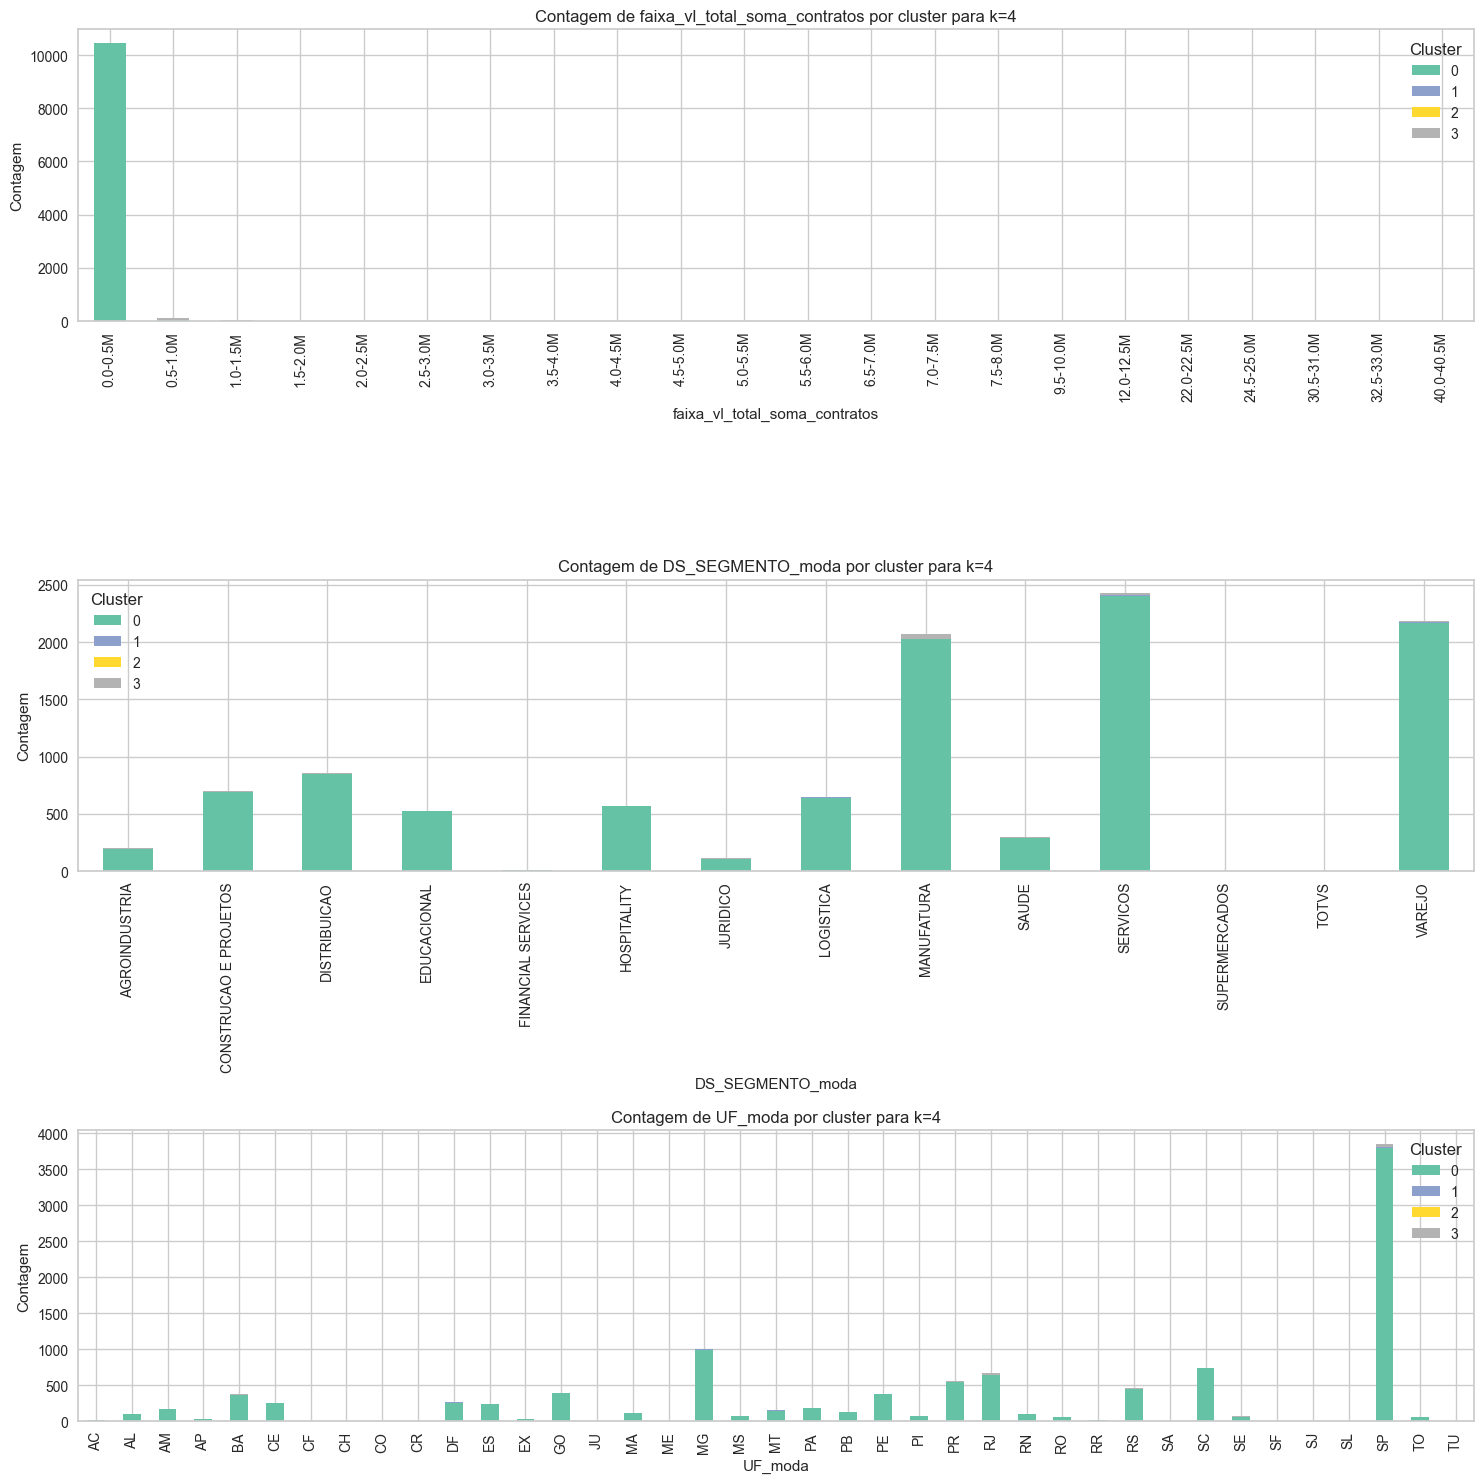

C:\Users\gxmar\AppData\Local\Temp\ipykernel_19268\2192882888.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Set2', len(df[f'cluster_{k}'].unique()))


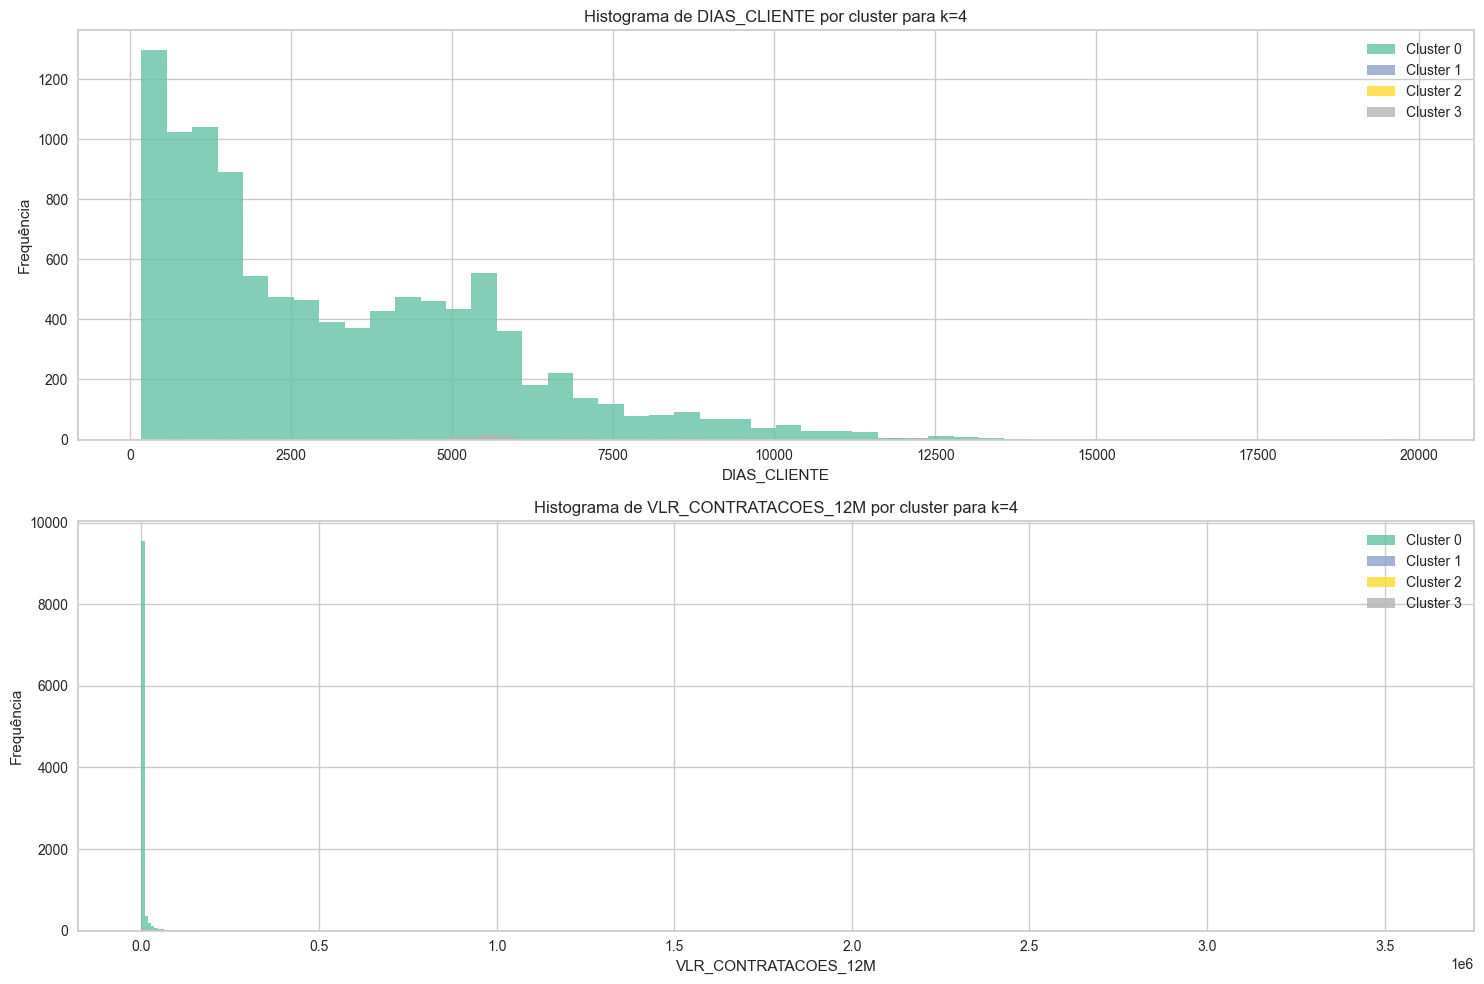


Clusterização com k=5:

Clusterização com k=5, init=Cao
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initia

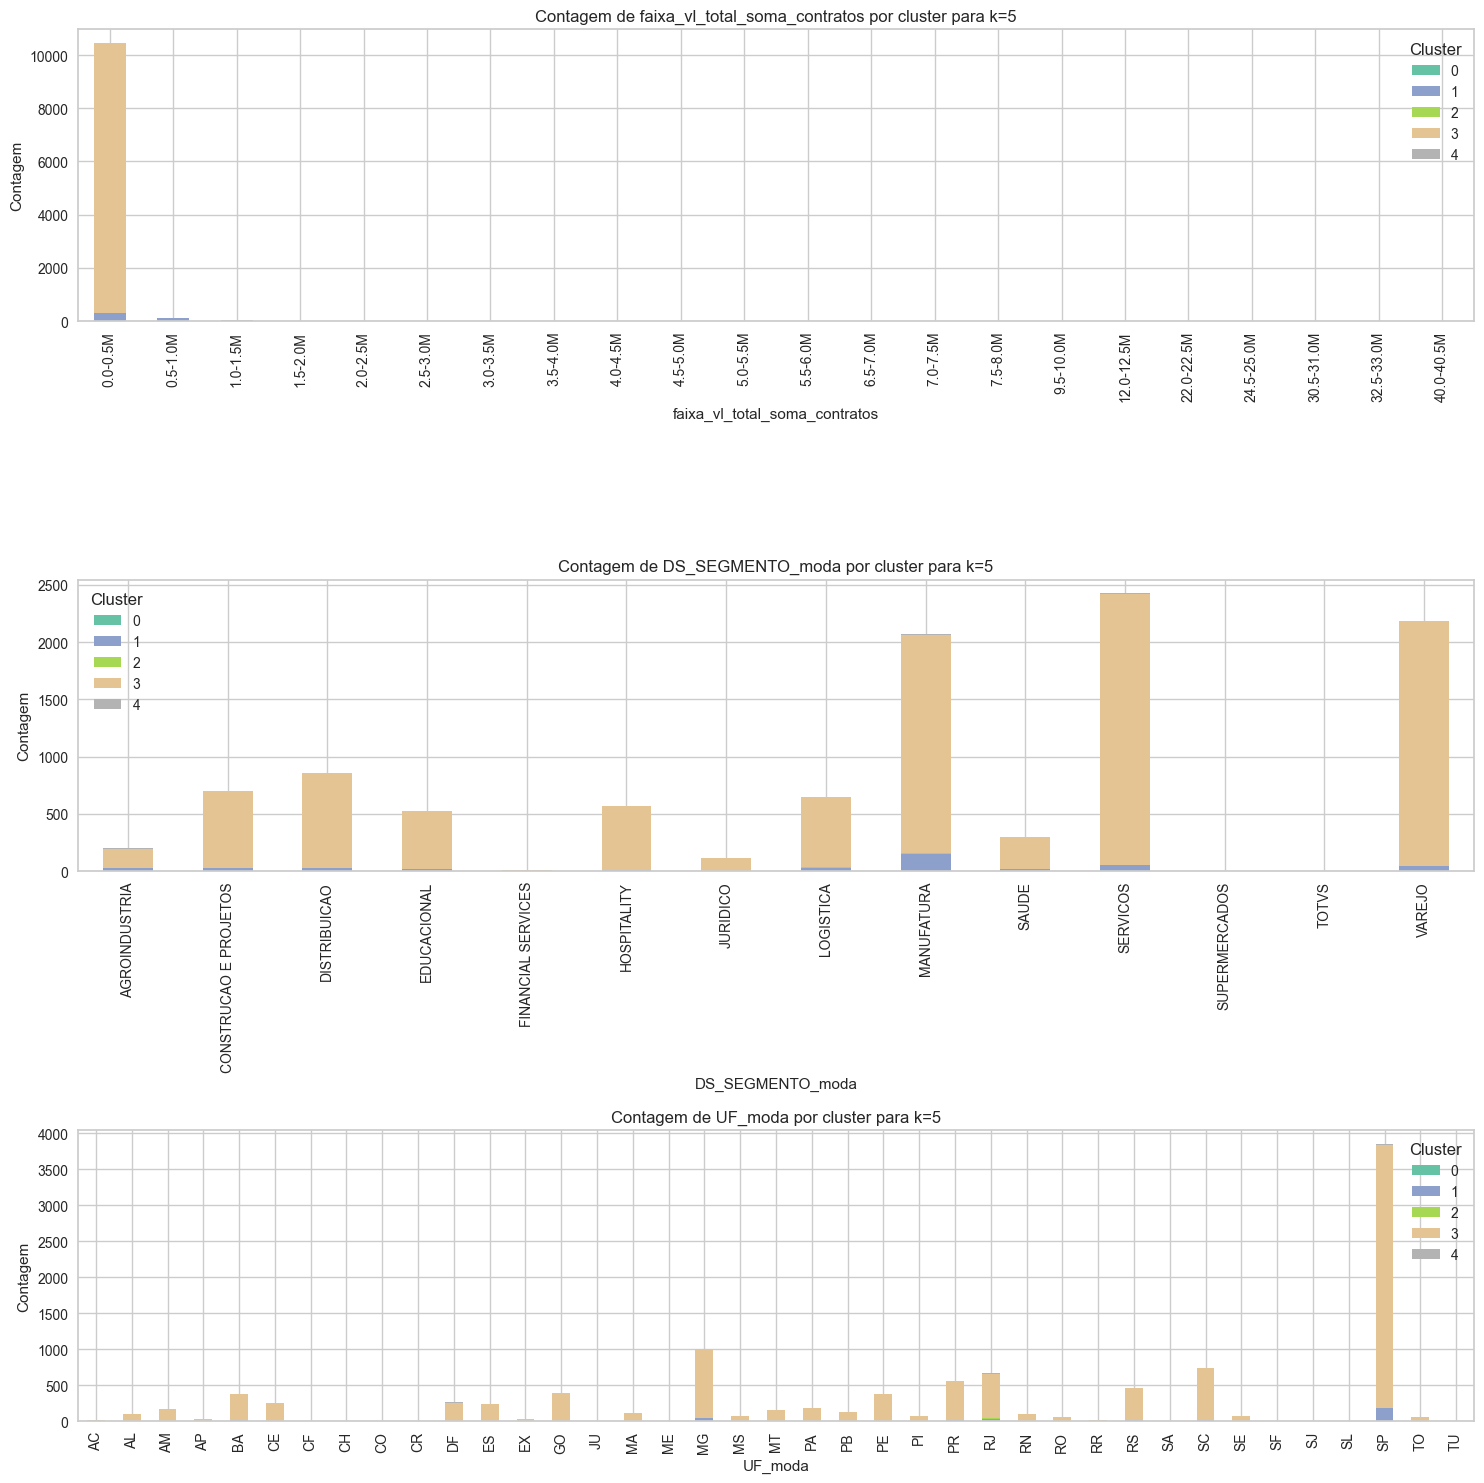

C:\Users\gxmar\AppData\Local\Temp\ipykernel_19268\2192882888.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Set2', len(df[f'cluster_{k}'].unique()))


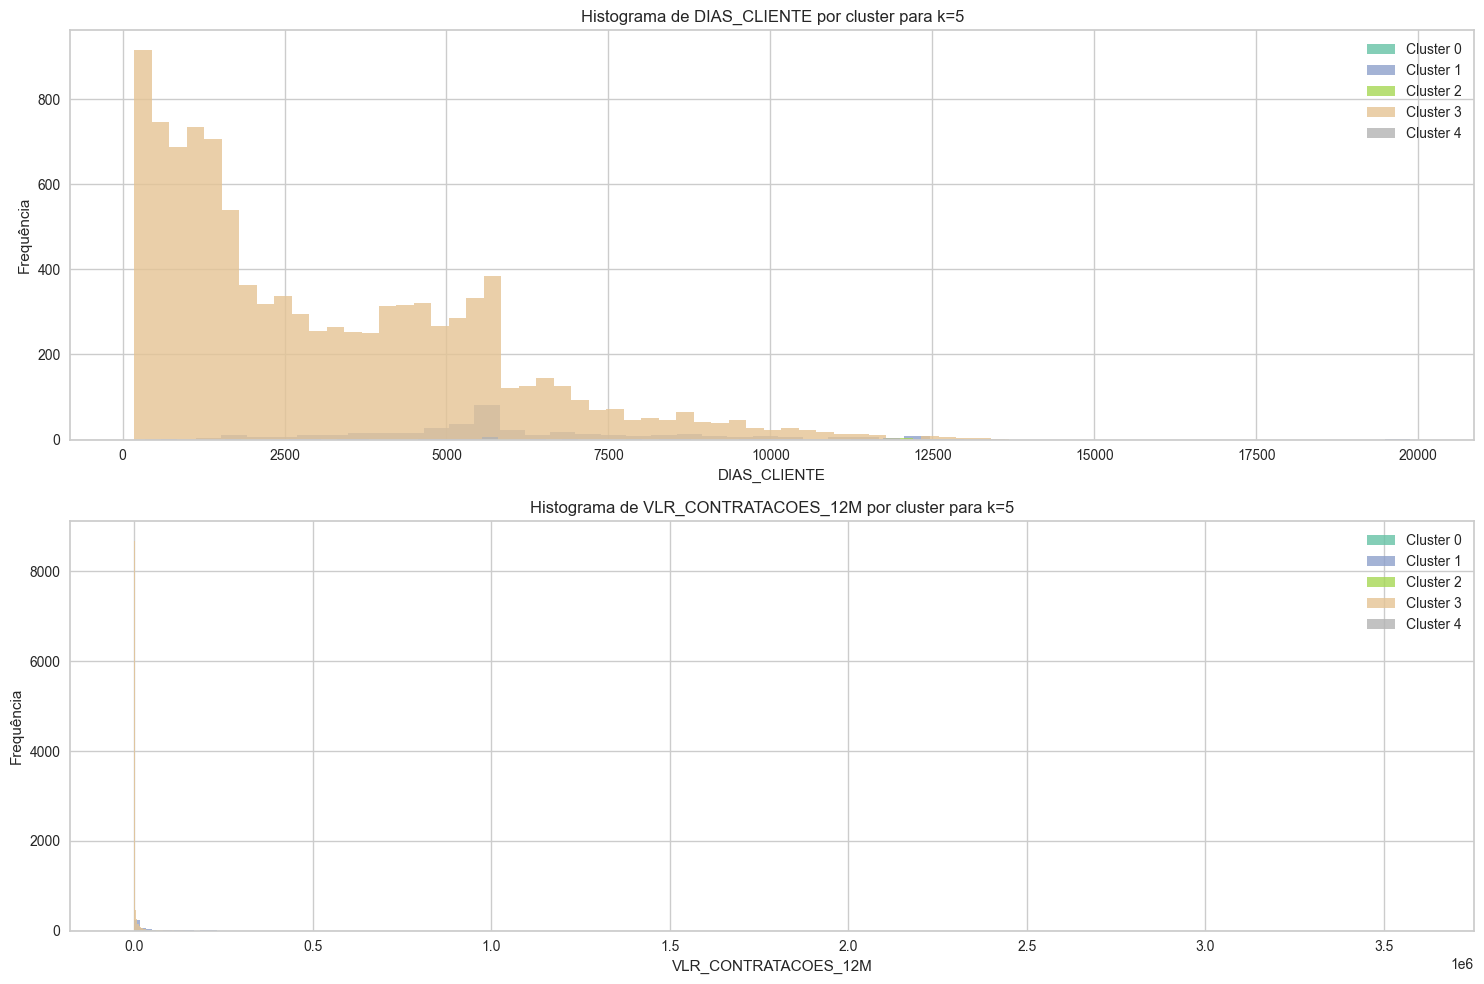


Clusterização com k=6:

Clusterização com k=6, init=Cao
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 289, ncost: 2065962457609242.0
Run: 1, iteration: 2/100, moves: 160, ncost: 437360972512561.75
Run: 1, iteration: 3/100, moves: 52, ncost: 350927415718489.94
Run: 1, iteration: 4/100, moves: 28, ncost: 345533214886998.4
Run: 1, iteration: 5/100, moves: 25, ncost: 344906883673440.3
Run: 1, iteration: 6/100, moves: 12, ncost: 344895443305066.25
Run: 1, iteration: 7/100, moves: 4, ncost: 344893906275614.9
Run: 1

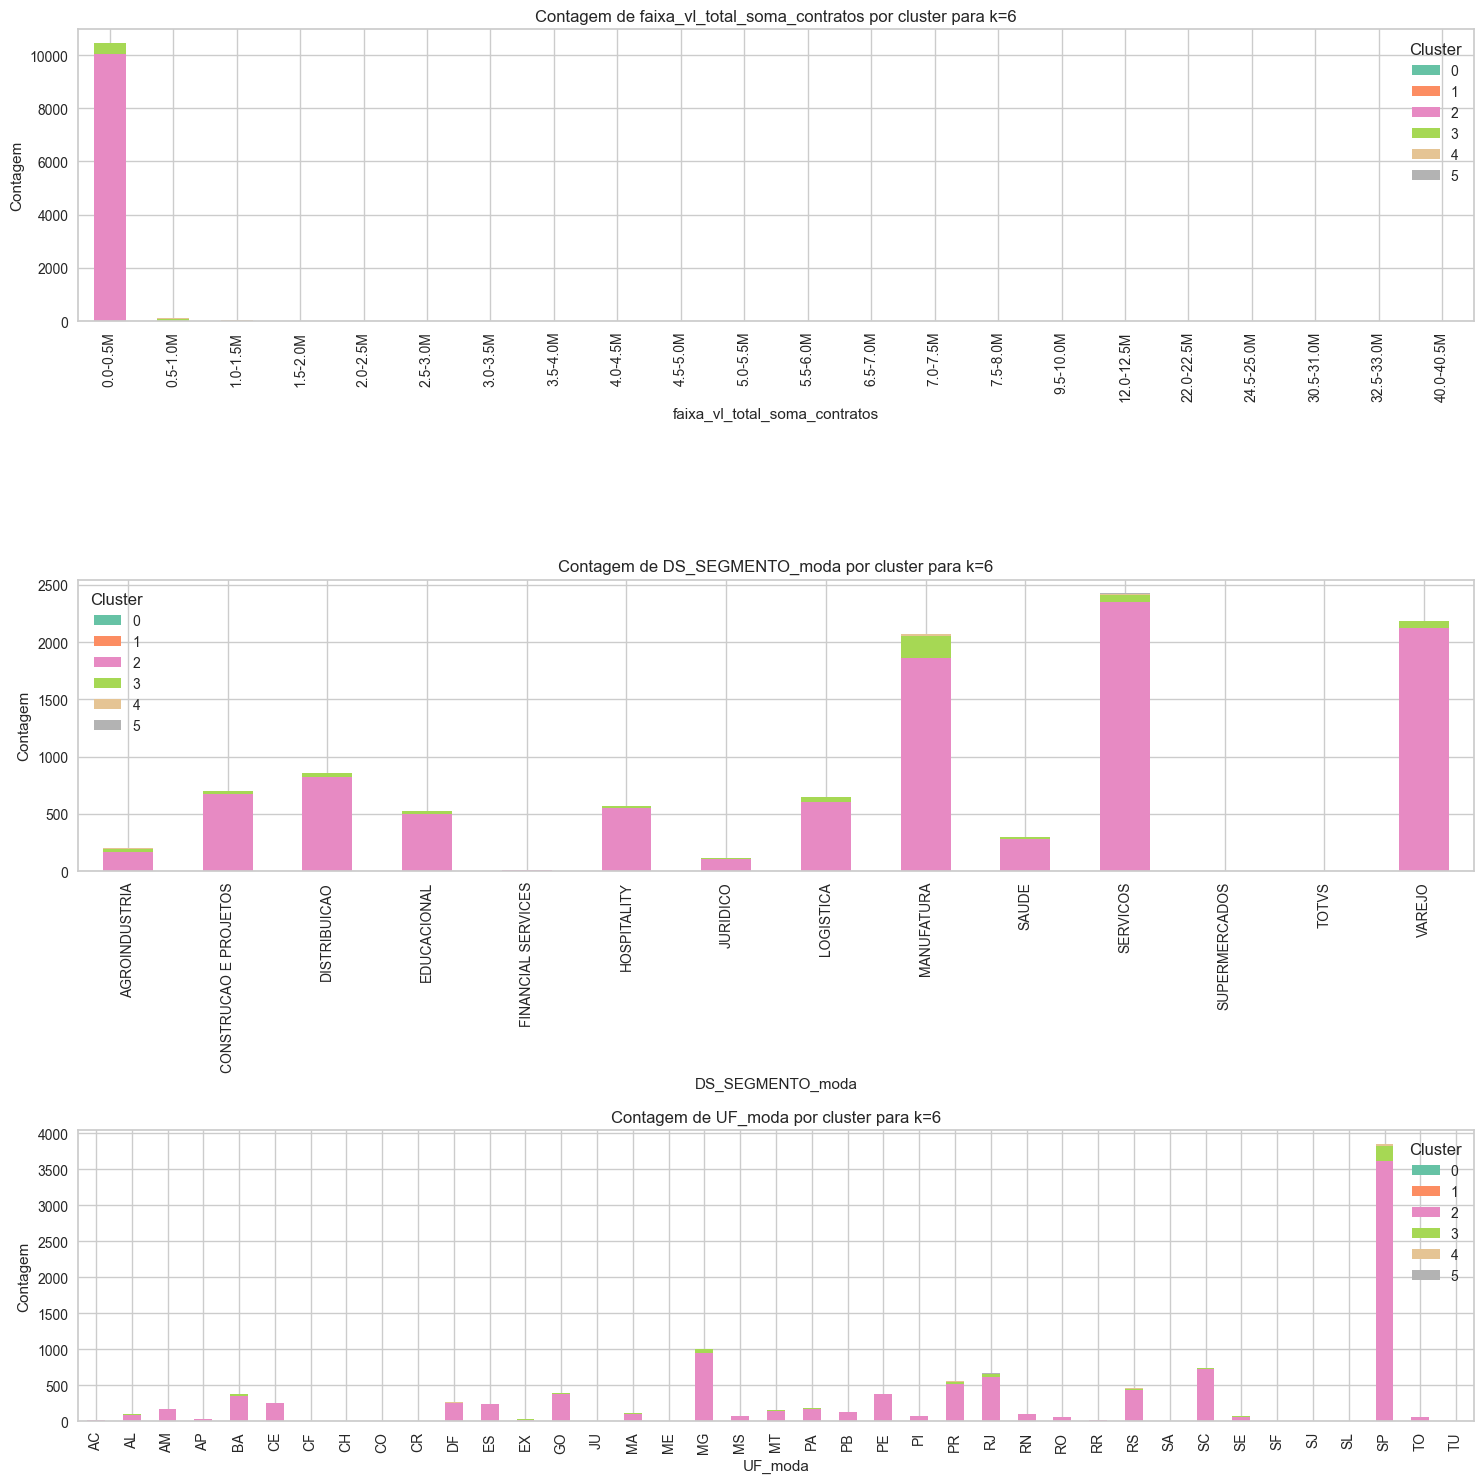

C:\Users\gxmar\AppData\Local\Temp\ipykernel_19268\2192882888.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Set2', len(df[f'cluster_{k}'].unique()))


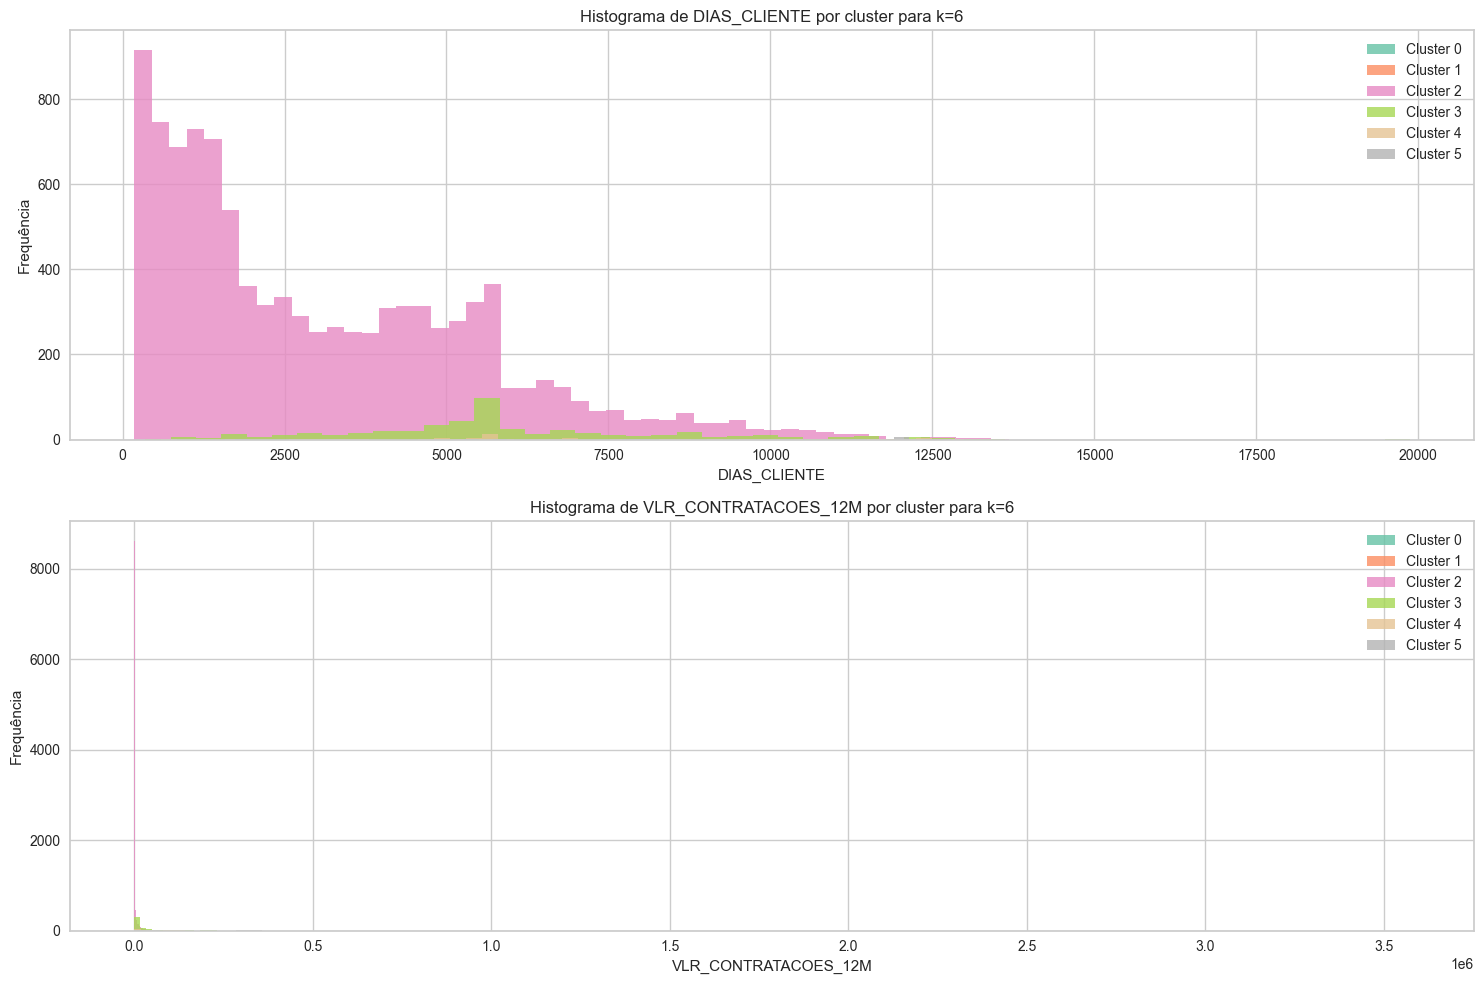


Comparação final entre os indicadores de cada clusterização:


Melhor k: 3 com base no silhouette score (0.9833).

   clusters init  silhouette_score  davies_bouldin_score  \
0         3  Cao          0.983278              0.344583   
1         4  Cao          0.936245              0.454707   
2         5  Cao          0.881935              0.497883   
3         6  Cao          0.866352              0.510565   

   calinski_harabasz_score  
0             49758.643490  
1             45252.286727  
2             40406.399744  
3             39280.517546  


In [124]:
# Pipeline de clusterização com diversos valores de k

# Lista com os nomes das colunas de avaliação
colunas_avaliacao = ["clusters", "init", "silhouette_score", "davies_bouldin_score", "calinski_harabasz_score"]

# Cria um DataFrame vazio para avaliação
df_avaliacao_2 = pd.DataFrame(columns=colunas_avaliacao)

best_score_overall = 0
best_k_overall = 0

for k in valores_k:
    best_score = 0
    best_labels = None
    print(f"\nClusterização com k={k}:\n")
    for init in lista_init:
        # Clusterização
        print(f"Clusterização com k={k}, init={init}")
        kproto, labels, cluster_pred = clusterização_kproto(x, k, init, categorical_idx)

        # Alimentando o df de avaliação geral dos clusters
        score, db_index, ch_index = avaliacao_clusterizacao_kproto(x, labels)
        print(f"Silhouette Score: {score:.4f}, Davies-Bouldin Index: {db_index:.4f}, Calinski-Harabasz Index: {ch_index:.4f}\n")
        alimenta_df_avaliacao_clusterizacao_kproto(df_avaliacao_2, k, init, score, db_index, ch_index)

        # Usando o sihlouette score para atribuir o melhor modelo dentro de cada k
        if best_score == 0:
            best_score = score
            best_labels = labels
        elif score > best_score:
            best_score = score
            best_labels = labels

    #print(f"\nVisualização da clusterização com {k} clusters:\n")
    #visualiza_clusters(x, labels, k)

    # Alimentando os dfs originais com os clusters 
    df_agrupado[f"cluster_{k}"] = best_labels
    df_agrupado_2[f"cluster_{k}"] = best_labels

    # Exibição no número de clientes e casos por cluster
    print(f"\nNúmero de clientes ,valor total e média dos contratos totais por cluster para k={k}:\n")
    mostra_contagem_clientes_casos(df_agrupado, k)

    # Gerando os gráficos de distribuiução dos valores de cada coluna por cluster
    print(f"\nGráficos de distribuição para k={k}:\n")
    visualiza_colunas_por_cluster(df_agrupado, k)

    if best_score > best_score_overall:
        best_score_overall = best_score
        best_k_overall = k

# Exibindo df com a avaliação da clusterização
print("\nComparação final entre os indicadores de cada clusterização:\n")
print(f"\nMelhor k: {best_k_overall} com base no silhouette score ({best_score_overall:.4f}).\n")
print(df_avaliacao_2)

# Avaliação final

silhouette_score: quanto maior, melhor

davies_bouldin_score : quanto menor, melhor

calinski_harabasz_score: quanto maior, melhor

In [125]:
df_avaliacao_2

,clusters,init,silhouette_score,davies_bouldin_score,calinski_harabasz_score
0,3,Cao,0.983278,0.344583,49758.643490
1,4,Cao,0.936245,0.454707,45252.286727
2,5,Cao,0.881935,0.497883,40406.399744
3,6,Cao,0.866352,0.510565,39280.517546


In [126]:
# métricas para avaliação do k ideal

for k in range (3, k_max+1):
    with pd.option_context('display.float_format', '{:.2f}'.format):

        print(df_agrupado_2.groupby(f'cluster_{k}').agg({'CD_CLIENTE': 'count',
                                                    'UF_moda': agg_moda,
                                                    'VL_TOTAL_CONTRATO_soma': ['sum', 'median', 'min', 'max'],
                                                    'DIAS_CLIENTE': 'median',
                                                    'QTD_CONTRATACOES_12M': 'mean',
                                                    'VLR_CONTRATACOES_12M': 'mean'}).reset_index().value_counts())

(cluster_3, )  (CD_CLIENTE, count)  (UF_moda, agg_moda)  (VL_TOTAL_CONTRATO_soma, sum)  (VL_TOTAL_CONTRATO_soma, median)  (VL_TOTAL_CONTRATO_soma, min)  (VL_TOTAL_CONTRATO_soma, max)  (DIAS_CLIENTE, median)  (QTD_CONTRATACOES_12M, mean)  (VLR_CONTRATACOES_12M, mean)
0              21                   SP                   110768628.66                   4559474.47                        2750965.04                     12432809.61                    11894.00                1.90                          220591.49                       1
1              5                    SP                   150341076.04                   30962261.14                       22154425.07                    40060521.43                    11738.00                0.40                          0.00                            1
2              10589                SP                   483338591.73                   5334.64                           0.00                           2537780.05                     2549.

# Exportação

In [127]:
df_agrupado_2.columns

Index(['CD_CLIENTE', 'DS_PROD_moda', 'DS_LIN_REC_moda', 'CIDADE_moda',
       'DS_CNAE_moda', 'DS_SEGMENTO_moda', 'DS_SUBSEGMENTO_moda',
       'MARCA_TOTVS_moda', 'MODAL_COMERC_moda', 'PAIS_moda',
       'PERIODICIDADE_moda', 'UF_moda', 'VL_TOTAL_CONTRATO_soma',
       'faixa_vl_total_soma_contratos', 'DIAS_CLIENTE', 'QTD_CONTRATACOES_12M',
       'VLR_CONTRATACOES_12M', 'cluster_3', 'cluster_4', 'cluster_5',
       'cluster_6'],
      dtype='object')

In [128]:
# renomeando colunas do df final

df_agrupado_2.columns = ['CD_CLIENTE', 'DS_PROD_MODA', 'DS_LIN_REC_MODA', 'CIDADE',
       'DS_CNAE', 'DS_SEGMENTO', 'DS_SUBSEGMENTO',
       'MARCA_TOTVS_MODA', 'MODAL_COMERC_MODA', 'PAIS',
       'PERIODICIDADE_MODA', 'UF', 'VL_TOTAL_CONTRATO_SOMA',
       'FAIXA_VLR_TOT_SOMA_CONTRATOS', 'DIAS_CLIENTE', 'QTD_CONTRATACOES_12M',
       'VLR_CONTRATACOES_12M', 'CLUSTER_3', 'CLUSTER_4', 'CLUSTER_5',
       'CLUSTER_6']

In [129]:
df_agrupado_2

,CD_CLIENTE,DS_PROD_MODA,DS_LIN_REC_MODA,CIDADE,DS_CNAE,DS_SEGMENTO,DS_SUBSEGMENTO,MARCA_TOTVS_MODA,MODAL_COMERC_MODA,PAIS,...,UF,VL_TOTAL_CONTRATO_SOMA,FAIXA_VLR_TOT_SOMA_CONTRATOS,DIAS_CLIENTE,QTD_CONTRATACOES_12M,VLR_CONTRATACOES_12M,CLUSTER_3,CLUSTER_4,CLUSTER_5,CLUSTER_6
0,99069,CLOUD IAAS 36M,SAAS SERIE T,SAOPAULO,COMERCIO VAREJISTA ESPECIALIZADO DE EQUIPAMENT...,VAREJO,VAREJO,CLOUD,MODALIDADE ASSINATURA COMPLEMENTAR,105,...,SP,8.120772e+03,0.0-0.5M,2940,0.0,0.000000,2,0,3,2
1,99958,ADESAO TOTVS P,SAAS SMS ALUGUEL,JOINVILLE,PESSOA FISICA (SEM CNAE),SERVICOS,PROVEDOR SERVICOS,CROSS - TRADICIONAL,MODALIDADE ALUGUEL (LEGADO),105,...,SC,1.634142e+06,1.5-2.0M,3451,0.0,0.000000,2,3,4,4
2,99999,CR.WN06.CsA,CDU TOTVS SERIE T,SAOPAULO,Desenvolvimento de programas de computador sob...,TOTVS,TOTVS,MODALIDADE TRADICIONAL,MODALIDADE TRADICIONAL,105,...,SP,4.271960e+01,0.0-0.5M,7034,0.0,0.000000,2,0,3,2
3,CARAMU,ADESAO OT LOG PLA 500 VIAGENS,CDU TOTVS SERIE T,ITUMBIARA,"Fabricacao de oleos vegetais refinados, exceto...",MANUFATURA,BENS DE CONSUMO,OTIMIZACAO LOGISTICA,MODALIDADE ASSINATURA COMPLEMENTAR,105,...,GO,8.531457e+04,0.0-0.5M,1189,0.0,0.000000,2,0,3,2
4,T00018,CDU LGT G CAP HUMANO TRAD,CDU TOTVS SERIE T,SAOPAULO,Hoteis,SERVICOS,VIAGENS,HOSPITALIDADE - CORE,MODALIDADE TRADICIONAL,105,...,SP,2.051230e+02,0.0-0.5M,8661,0.0,0.000000,2,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10610,TFEEXW,05 IDS FLUIG PLATAFORMA,SAAS INTERA SOFTWARE,BELOHORIZONTE,"Atividades de atendimento hospitalar, exceto p...",SAUDE,HOSPITAIS,RH - CORE,MODALIDADE ASSINATURA COMPLEMENTAR,105,...,MG,3.041294e+04,0.0-0.5M,181,2.0,30412.949059,2,0,3,2
10611,TFEEYC,TEF TOTVS CLOUD PDV PRINCIPAL,SAAS TEF,GOIANIA,Comercio varejista de calcados,VAREJO,MODA,DISTRIBUICAO & VAREJO - CORE,MODALIDADE ASSINATURA COMPLEMENTAR,105,...,GO,6.010675e+01,0.0-0.5M,178,1.0,60.106753,2,0,3,2
10612,TFEEYH,CONS SAT OU MFE BALANC SUBSC,SAAS SERIE T,ITAITINGA,"Comercio varejista de mercadorias em geral, co...",VAREJO,SUPERMERCADO,SUPERMERCADOS - CORE,MODALIDADE ASSINATURA COMPLEMENTAR,105,...,CE,3.600225e+02,0.0-0.5M,178,1.0,360.022549,2,0,3,2
10613,TFEEYP,ALMOXARIFADO E ESTOQUE,SAAS CMNET HOTAL,CANELA,Hoteis,HOSPITALITY,HOSPEDAGEM,HOSPITALIDADE - CORE,MODALIDADE ASSINATURA COMPLEMENTAR,105,...,RS,1.705934e+03,0.0-0.5M,178,1.0,1705.933728,2,0,3,2


In [131]:
df_agrupado_2.to_csv('clientes_clusterizados_v1.csv', index=False, sep=';', decimal=',')